In [1]:
"""This module is gonna be the center of control of my programm. That's where I am gonna lunch the execution of the different parts of the code. Depending on what I want to do, I will run part(s) of the project or the whole one. For instance, if I want to test the complete programm I will be able to run all with one click. At the opposite, if I want to test a new module functionnning, I will run this one only. """

"This module is gonna be the center of control of my programm. That's where I am gonna lunch the execution of the different parts of the code. Depending on what I want to do, I will run part(s) of the project or the whole one. For instance, if I want to test the complete programm I will be able to run all with one click. At the opposite, if I want to test a new module functionnning, I will run this one only. "

.ipynb settings

In [2]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

In [3]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions



# I) <u> Raw data importation, visualisation, preprocessing  </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Import csv data</font>

In [4]:
#src.data.make_dataset

from data import make_dataset

Footy_stats_files = [make_dataset.footy_2015_adr, make_dataset.footy_2016_adr,
                     make_dataset.footy_2017_adr, make_dataset.footy_2018_adr, 
                     make_dataset.footy_2019_adr, make_dataset.footy_2020_adr,
                     make_dataset.footy_2021_adr, make_dataset.footy_2022_adr, 
                     make_dataset.footy_2023_adr, make_dataset.footy_2024_adr]

Football_data_files = [make_dataset.football_data_2015_adr, make_dataset.football_data_2016_adr,
                       make_dataset.football_data_2017_adr, make_dataset.football_data_2018_adr,
                       make_dataset.football_data_2019_adr, make_dataset.football_data_2020_adr,
                       make_dataset.football_data_2021_adr, make_dataset.football_data_2022_adr,
                       make_dataset.football_data_2023_adr, make_dataset.football_data_2024_adr]

# convert csv files into big dataframes
# Footy dataset
footy_dataset_to_save_01 = make_dataset.read_data(Footy_stats_files, 'footy')
# Football-Data dataset
football_data_dataset_to_save_01 = make_dataset.read_data(Football_data_files, 'football data')

#We delete a line full of Nan values
football_data_dataset_to_save_01.drop(760, inplace = True)
football_data_dataset_to_save_02 = football_data_dataset_to_save_01.reset_index(drop=False)



# We save the dataframes created into data/interim folder, after having deleted the old ones.
#Footy Stats dataset
make_dataset.save_dataframe(footy_dataset_to_save_01, 'interim/footy_ds_interim')
#Football-Data dataset
make_dataset.save_dataframe(football_data_dataset_to_save_02, 'interim/football_data_ds_interim')

The dataframes ARE the same for both old and new interim/footy_ds_interim
Successfully deleted the old file:               interim/footy_ds_interim
Successfully saved the new dataframe:            interim/footy_ds_interim


The dataframes ARE the same for both old and new interim/football_data_ds_interim
Successfully deleted the old file:               interim/football_data_ds_interim
Successfully saved the new dataframe:            interim/football_data_ds_interim




<span style="color:#FF1493;"> <strong> <font size="4">2) Combine data of 'Footy Stats' and 'Football Data' datasets</font>

In [5]:
#src.data.data_combination

from data import data_combination

# Open the dataframes saved
# Footy dataset
dataset_footy_01 = make_dataset.load_data(True, 'interim/footy_ds_interim')
# Footabll Data dataset
dataset_football_data_01 = make_dataset.load_data(True, 'interim/football_data_ds_interim')


# Uniformise teams names
dataset_football_data_02, dataset_footy_02 = data_combination.team_names_uniformisation(dataset_football_data_01.copy(), dataset_footy_01.copy())

# Replace Footy Stats shots by the values of Football Data
dataset_footy_03 = data_combination.replace_col_values('home_team_shots', 'HS', dataset_footy_02.copy(), dataset_football_data_02.copy())
dataset_footy_04 = data_combination.replace_col_values('away_team_shots', 'AS', dataset_footy_03.copy(), dataset_football_data_02.copy())
# Replace Footy Stats shots_on_target by the values of Football Data
dataset_footy_05 = data_combination.replace_col_values('home_team_shots_on_target', 'HST', dataset_footy_04.copy(), dataset_football_data_02.copy())
dataset_footy_06 = data_combination.replace_col_values('away_team_shots_on_target', 'AST', dataset_footy_05.copy(), dataset_football_data_02.copy())

dataset_00 = dataset_footy_06

The interim/footy_ds_interim dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


The interim/football_data_ds_interim dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In the column home_team_shots of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column home_team_shots_on_target of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots_on_target of footy_dataset, 3507 values were modified, 1 were not because the corresponding value in football_data_dataset was Nan.


<span style="color:#FF1493;"> <strong> <font size="4">3)Imputation</font>

In [6]:
#src.data.preprocessing
from data import preprocessing

# We select the features we want to use to conduct imputation on xg
features_fo_HT_xg_imputation = ['home_team_goal_count', 'home_team_corner_count', 'odds_ft_home_team_win', 'home_team_shots', 'home_team_shots_on_target', 'home_team_possession']
features_fo_AT_xg_imputation = ['away_team_goal_count', 'away_team_corner_count', 'odds_ft_away_team_win', 'away_team_shots', 'away_team_shots_on_target', 'away_team_possession']

#Data imputation for XG:
dataset_001 = preprocessing.imputation('team_a_xg', features_fo_HT_xg_imputation, dataset_00.copy())
dataset_01 = preprocessing.imputation('team_b_xg', features_fo_AT_xg_imputation, dataset_001.copy())


# We test if the previous action has not modified other col than the ones we immputed
useful_functions.compare_2_df_excepted_col(['team_a_xg'], dataset_00.copy(), dataset_001.copy(), 'dataset_00', 'dataset_001')
useful_functions.compare_2_df_excepted_col(['team_b_xg'], dataset_001.copy(), dataset_01.copy(), 'dataset_001', 'dataset_01')



The DataFrames dataset_00 and dataset_001 are equal except for columns ['team_a_xg']
The DataFrames dataset_001 and dataset_01 are equal except for columns ['team_b_xg']


True

<span style="color:#FF1493;"> <strong> <font size="4">4) Visualize raw data</font>

In [7]:
#src.visualization.visualize
"""
if __name__ == '__main__':
    from visualization import visualize


#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.

visualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)
"""

"\nif __name__ == '__main__':\n    from visualization import visualize\n\n\n#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.\n\nvisualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)\n"

# II) <u> Features engineering  </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Create columns for new features:</font>

In [8]:
#features.initialize_new_features_columns

if __name__ == '__main__':
    from features import initialize_new_features_columns

#We create the new columns in dataset and stock the columns ranks variables into dico_col_rk
dataset_02, dico_col_rk = initialize_new_features_columns.add_columns_and_complete_col_ranks(dataset_01.copy())

#We execute a test to verify the columns and columns ranks variables have been correcctly created
initialize_new_features_columns.test_columns_ranks(dico_col_rk, theoritical_df_col_nb = 203, dataset_0 = dataset_02.copy())


the function add_columns_and_complete_col_ranks() was executed correctly


True

<span style="color:#FF1493;"> <strong> <font size="4"> 2) Create new features:</font>

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Resultat
</span style="color:#FF1493;"> </font size="4">

(pm = pre-match)
(sbos = since the beginning of the season)

In [9]:
#src.features.make_new_features
if __name__ == '__main__':
    from features import make_new_features


#We add the matchs results 
dataset_03 = make_new_features.matchs_results(dataset_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['RH',
                                            'RA'], dataset_02.copy(), dataset_03.copy(), 'dataset_02', 'dataset_03')


#We add the Home or Away status of the teams
dataset_04 = make_new_features.home_away_status(dataset_03.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_H_A_status',
                                            'AT_H_A_status'], dataset_03.copy(), dataset_04.copy(), 'dataset_03', 'dataset_04')


#Calculation and manipulation of NB DE MATCHS et NB DE VICTOIRES (pm, sbos)
#VARIABLES                    V 
# We add the number of matches and number of victories
dataset_05 = make_new_features.nb_matchs_nb_victories(dico_col_rk.copy(), dataset_04.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_played_matchs_nb',
                                            'AT_played_matchs_nb',
                                            'HT_victories_nb',
                                            'AT_victories_nb'], dataset_04.copy(), dataset_05.copy(), 'dataset_04', 'dataset_05')

#Calculation and manipulation of VICTORY (pm, sbos):
#VARIABLE                     X
#PER MATCH AVG                V 
#PER MATCH AVG HT/AT DIFF     V
#We add the avg victories per match and its HT-AT difference
dataset_06 = make_new_features.victories_per_match_AVG_and_DIFF(dataset_05.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_victory_pm',
                                            'AT_avg_victory_pm',
                                            'Diff_HT_avg_victory_pm',
                                            'Diff_AT_avg_victory_pm'], dataset_05.copy(), dataset_06.copy(), 'dataset_05', 'dataset_06')

#(POINTS COLLECTED x (1 + ADVERSARY AVG VICTORY PER MATCH)) (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the avg points per match ponderated by adversary perf, and its HT-AT difference
dataset_07 = make_new_features.points_pm_ponderated_by_adversary_perf(dico_col_rk.copy(), dataset_06.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_points_ponderated_by_adversary_perf',
                                            'AT_points_ponderated_by_adversary_perf',
                                            'HT_avg_pm_points_ponderated_by_adversary_perf',  
                                            'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf'], dataset_06.copy(), dataset_07.copy(), 'dataset_06', 'dataset_07')

#Calculation and manipulation of NB OF SCORED GOALS and NB CONCEDED GOALS (pm, sbos)
#VARRIABLE                    V
#We add the nb of goals scored and conceded
dataset_08 = make_new_features.scored_and_conceded_goals(dico_col_rk.copy(), dataset_07.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['scored_goals_HT_PM',
                                            'conceded_goals_HT_PM',
                                            'scored_goals_AT_PM',  
                                            'conceded_goals_AT_PM'], dataset_07.copy(), dataset_08.copy(), 'dataset_07', 'dataset_08')


#GOAL DIFFERENCE (pm, sbos): 
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the goal difference
dataset_09 = make_new_features.goal_difference(dataset_08.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['goal_diff_HT_PM',
                                            'goal_diff_AT_PM',
                                            'HT_avg_goal_diff_pm',  
                                            'AT_avg_goal_diff_pm',
                                            'Diff_HT_goal_diff_pm',
                                            'Diff_AT_goal_diff_pm'], dataset_08.copy(), dataset_09.copy(), 'dataset_08', 'dataset_09')


#SCORED GOALS / CONCEDED GOALS (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                X 
#HT/AT DIFF                   V
#We add the ratio scored goals/conceded goals
dataset_10 = make_new_features.scored_conceded_goals_ratio(dataset_09.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_scored_g_conceded_g_ratio',
                                            'AT_avg_scored_g_conceded_g_ratio',
                                            'Diff_HT_avg_scored_g_conceded_g_ratio',  
                                            'Diff_AT_avg_scored_g_conceded_g_ratio'], dataset_09.copy(), dataset_10.copy(), 'dataset_09', 'dataset_10')


#POINTS NB (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the points number
dataset_11 = make_new_features.points_nb(dico_col_rk.copy(),dataset_10.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Prematch_HT_PN',
                                            'Prematch_AT_PN',
                                            'HT_avg_collected_points_pm',  
                                            'AT_avg_collected_points_pm',
                                            'Diff_pnt_HT_ratio',
                                            'Diff_pnt_AT_ratio'], dataset_10.copy(), dataset_11.copy(), 'dataset_10', 'dataset_11')



#RANKING (pm, sbos) :
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add ranks prematch
dataset_12 = make_new_features.ranking(dico_col_rk.copy(), dataset_11.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_week_ranking',
                                            'AT_week_ranking',
                                            'Diff_HT_ranking',  
                                            'Diff_AT_ranking'], dataset_11.copy(), dataset_12.copy(), 'dataset_11', 'dataset_12')


#ANNUAL BUDGET:
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the annual budgets of teams
dataset_13 = make_new_features.annnual_budget(dataset_12.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['annual budget of HT',
                                            'annual budget of AT',
                                            'Diff_HT_annual_budget',  
                                            'Diff_AT_annual_budget'], dataset_12.copy(), dataset_13.copy(), 'dataset_12', 'dataset_13')
#We test if there is no 0 values in the columns
useful_functions.is_there_x_values(0, ['annual budget of HT','annual budget of AT'], dataset_13.copy())


#POINTS NB ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the points nb on 1,3,5 last matchs
dataset_14 = make_new_features.points_nb_on_x_last_matchs(dico_col_rk.copy(), dataset_13.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Points_HT_5lm_PM',
                                            'Points_AT_5lm_PM',
                                            'Points_HT_3lm_PM',
                                            'Points_AT_3lm_PM',
                                            'Points_HT_1lm_PM',
                                            'Points_AT_1lm_PM',
                                            'HT_Diff_Points_5lm',  
                                            'AT_Diff_Points_5lm',
                                            'HT_Diff_Points_3lm',
                                            'AT_Diff_Points_3lm',
                                            'HT_Diff_Points_1lm',
                                            'AT_Diff_Points_1lm'], dataset_13.copy(), dataset_14.copy(), 'dataset_13', 'dataset_14')


#GOAL DIFF ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the goal diff on 1,3,5 last matches
dataset_15 = make_new_features.goal_diff_on_x_last_matchs(dico_col_rk.copy(), dataset_14.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['GoalDiff_HT_5lm_PM',
                                            'GoalDiff_AT_5lm_PM',
                                            'GoalDiff_HT_3lm_PM',
                                            'GoalDiff_AT_3lm_PM',
                                            'GoalDiff_HT_1lm_PM',
                                            'GoalDiff_AT_1lm_PM',
                                            'HT_Diff_Goal_Diff_5lm',  
                                            'AT_Diff_Goal_Diff_5lm',
                                            'HT_Diff_Goal_Diff_3lm',
                                            'AT_Diff_Goal_Diff_3lm',
                                            'HT_Diff_Goal_Diff_1lm',
                                            'AT_Diff_Goal_Diff_1lm'], dataset_14.copy(), dataset_15.copy(), 'dataset_14', 'dataset_15')


#RANKING ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the ranking on 1,3,5 last matches
dataset_16 = make_new_features.ranking_on_x_last_matchs(dico_col_rk.copy(), dataset_15.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_5lm_week_ranking',
                                            'AT_5lm_week_ranking',
                                            'HT_3lm_week_ranking',
                                            'AT_3lm_week_ranking',
                                            'HT_1lm_week_ranking',
                                            'AT_1lm_week_ranking',
                                            "Diff_HT_ranking_5lm",
                                            "Diff_AT_ranking_5lm",
                                            "Diff_HT_ranking_3lm",
                                            "Diff_AT_ranking_3lm",
                                            "Diff_HT_ranking_1lm",
                                            "Diff_AT_ranking_1lm"], dataset_15.copy(), dataset_16.copy(), 'dataset_15', 'dataset_16')

#We add the season of each match
#VARIABLE
dataset_17 = make_new_features.season_year(dataset_16.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Season_year'], dataset_16.copy(), dataset_17.copy(), 'dataset_16', 'dataset_17')


The DataFrames dataset_02 and dataset_03 are equal except for columns ['RH', 'RA']
The DataFrames dataset_03 and dataset_04 are equal except for columns ['HT_H_A_status', 'AT_H_A_status']
The DataFrames dataset_04 and dataset_05 are equal except for columns ['HT_played_matchs_nb', 'AT_played_matchs_nb', 'HT_victories_nb', 'AT_victories_nb']
The DataFrames dataset_05 and dataset_06 are equal except for columns ['HT_avg_victory_pm', 'AT_avg_victory_pm', 'Diff_HT_avg_victory_pm', 'Diff_AT_avg_victory_pm']
The DataFrames dataset_06 and dataset_07 are equal except for columns ['HT_points_ponderated_by_adversary_perf', 'AT_points_ponderated_by_adversary_perf', 'HT_avg_pm_points_ponderated_by_adversary_perf', 'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf']
The DataFrames dataset_07 and dataset_08 are equal except for columns ['scored_goals_HT_PM', 'conceded_goals_HT_PM', 'scored_goals_AT_PM', 'conce

True

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Jeu

In [10]:
#src.features.make_new_features

#CORNERS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_18 = make_new_features.corners_nb(dico_col_rk.copy(), dataset_17.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_corners_nb',
                                            'AT_corners_nb',
                                            'HT_Diff_avg_corners_nb',
                                            'AT_Diff_avg_corners_nb'], dataset_17.copy(), dataset_18.copy(), 'dataset_17', 'dataset_18')

#YELLOW, RED CARDS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_19 = make_new_features.yellow_red_cards(dico_col_rk.copy(), dataset_18.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_yellow_cards_nb',
                                            'AT_yellow_cards_nb',
                                            'HT_red_cards_nb',
                                            'AT_red_cards_nb',
                                            'HT_Diff_avg_yellow_cards_nb',
                                            'AT_Diff_avg_yellow_cards_nb',
                                            'HT_Diff_avg_red_cards_nb',
                                            'AT_Diff_avg_red_cards_nb',], dataset_18.copy(), dataset_19.copy(), 'dataset_18', 'dataset_19')

#SHOTS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_20 = make_new_features.shots_nb(dico_col_rk.copy(), dataset_19.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_nb',
                                            'AT_shots_nb',
                                            'HT_avg_shots_nb',
                                            'AT_avg_shots_nb',
                                            'HT_Diff_avg_shots_nb',
                                            'AT_Diff_avg_shots_nb'], dataset_19.copy(), dataset_20.copy(), 'dataset_19', 'dataset_20')

#SHOTS ON TARGET NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_21 = make_new_features.shots_on_target_nb(dico_col_rk.copy(), dataset_20.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_on_target_nb',
                                            'AT_shots_on_target_nb',
                                            'HT_avg_shots_on_target_nb',
                                            'AT_avg_shots_on_target_nb',
                                            'HT_Diff_avg_shots_on_target_nb',
                                            'AT_Diff_avg_shots_on_target_nb'], dataset_20.copy(), dataset_21.copy(), 'dataset_20', 'dataset_21')

#FOULS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_22 = make_new_features.fouls_nb(dico_col_rk.copy(), dataset_21.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_fouls_nb',
                                            'AT_fouls_nb',
                                            'HT_avg_fouls_nb',
                                            'AT_avg_fouls_nb',
                                            'HT_Diff_avg_fouls_nb',
                                            'AT_Diff_avg_fouls_nb'], dataset_21.copy(), dataset_22.copy(), 'dataset_21', 'dataset_22')

#POSSESSION (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_23 = make_new_features.possession(dico_col_rk.copy(), dataset_22.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_possession',
                                            'AT_possession',
                                            'HT_avg_possession',
                                            'AT_avg_possession',
                                            'HT_Diff_avg_possession',
                                            'AT_Diff_avg_possession'], dataset_22.copy(), dataset_23.copy(), 'dataset_22', 'dataset_23')

#EXPECTED GOALS / XG (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_24 = make_new_features.expected_goals(dico_col_rk.copy(), dataset_23.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_xg',
                                            'AT_xg',
                                            'HT_avg_xg',
                                            'AT_avg_xg',
                                            'HT_Diff_avg_xg',
                                            'AT_Diff_avg_xg'], dataset_23.copy(), dataset_24.copy(), 'dataset_23', 'dataset_24')

The DataFrames dataset_17 and dataset_18 are equal except for columns ['HT_corners_nb', 'AT_corners_nb', 'HT_Diff_avg_corners_nb', 'AT_Diff_avg_corners_nb']
The DataFrames dataset_18 and dataset_19 are equal except for columns ['HT_yellow_cards_nb', 'AT_yellow_cards_nb', 'HT_red_cards_nb', 'AT_red_cards_nb', 'HT_Diff_avg_yellow_cards_nb', 'AT_Diff_avg_yellow_cards_nb', 'HT_Diff_avg_red_cards_nb', 'AT_Diff_avg_red_cards_nb']
The DataFrames dataset_19 and dataset_20 are equal except for columns ['HT_shots_nb', 'AT_shots_nb', 'HT_avg_shots_nb', 'AT_avg_shots_nb', 'HT_Diff_avg_shots_nb', 'AT_Diff_avg_shots_nb']
The DataFrames dataset_20 and dataset_21 are equal except for columns ['HT_shots_on_target_nb', 'AT_shots_on_target_nb', 'HT_avg_shots_on_target_nb', 'AT_avg_shots_on_target_nb', 'HT_Diff_avg_shots_on_target_nb', 'AT_Diff_avg_shots_on_target_nb']
The DataFrames dataset_21 and dataset_22 are equal except for columns ['HT_fouls_nb', 'AT_fouls_nb', 'HT_avg_fouls_nb', 'AT_avg_fouls_nb',

True

<span style="color:#FF1493;">
<font size="3"> 
    Création/Manipulation des Statistiques de Côte

In [11]:
#src.features.make_new_features

# 1/VICTORY ODDS  (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_25 = make_new_features.odds_victory_proba(dico_col_rk.copy(), dataset_24.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_odds_victory_proba',
                                            'AT_odds_victory_proba',
                                            'HT_avg_odds_victory_proba',
                                            'AT_avg_odds_victory_proba',
                                            'HT_Diff_avg_odds_victory_proba',
                                            'AT_Diff_avg_odds_victory_proba'], dataset_24.copy(), dataset_25.copy(), 'dataset_24', 'dataset_25')

#Max odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
dataset_26 = make_new_features.max_odd(dataset_25.copy(),  dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_Max_odd',
                                            'ATW_Max_odd',
                                            'D_Max_odd'], dataset_25.copy(), dataset_26.copy(), 'dataset_25', 'dataset_26')

#Avg odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
dataset_27 = make_new_features.avg_odd(dataset_26.copy(),  dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_avg_odd',
                                            'ATW_avg_odd',
                                            'D_avg_odd'], dataset_26.copy(), dataset_27.copy(), 'dataset_26', 'dataset_27')

#Defining a dataframe that contains the data after features engineering
feat_engineered_ds = dataset_27

The DataFrames dataset_24 and dataset_25 are equal except for columns ['HT_odds_victory_proba', 'AT_odds_victory_proba', 'HT_avg_odds_victory_proba', 'AT_avg_odds_victory_proba', 'HT_Diff_avg_odds_victory_proba', 'AT_Diff_avg_odds_victory_proba']
The DataFrames dataset_25 and dataset_26 are equal except for columns ['HTW_Max_odd', 'ATW_Max_odd', 'D_Max_odd']
The DataFrames dataset_26 and dataset_27 are equal except for columns ['HTW_avg_odd', 'ATW_avg_odd', 'D_avg_odd']


<span style="color:#FF1493;"> <strong> <font size="4">4) Save dataset and look for changes

In [12]:
#Save the dataset
make_dataset.save_dataframe(feat_engineered_ds, 'interim/feat_engineered_ds')

#src.tests
# A test made to spot changes in the whole dataframe between the dataframe created by the last iteration of the programm and the previous one saved
"""
import tests

tests.test_changes_on_dataset(feat_engineered_ds.copy(), 'feat_engineered_ds_test')
"""

The dataframes ARE the same for both old and new interim/feat_engineered_ds
Successfully deleted the old file:               interim/feat_engineered_ds
Successfully saved the new dataframe:            interim/feat_engineered_ds




"\nimport tests\n\ntests.test_changes_on_dataset(feat_engineered_ds.copy(), 'feat_engineered_ds_test')\n"

# III) <u>First features selection </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Making out a min Game Week value overwhich data is reliable and stable

The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]




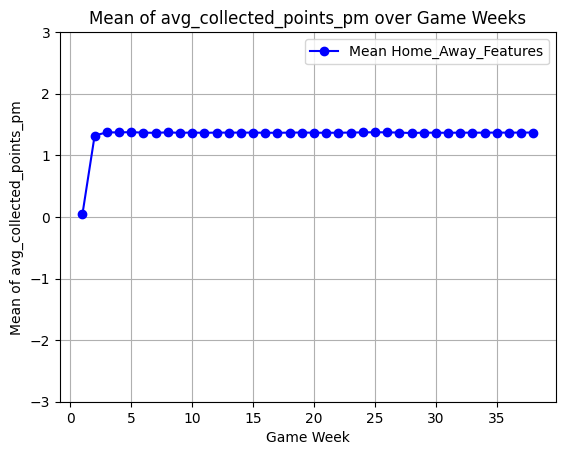

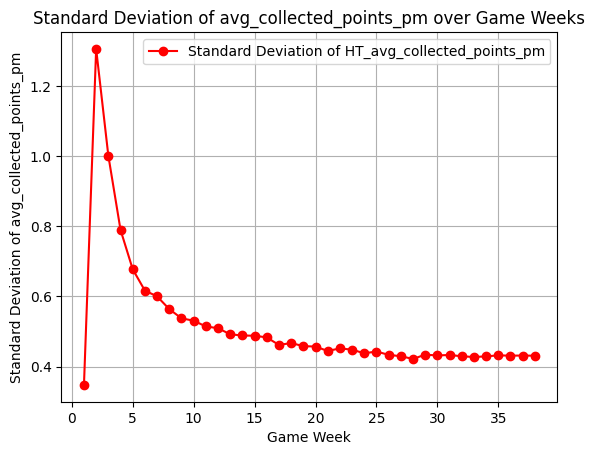

In [13]:
#src.features.features_selection
#Plot a specific feature avg over Game Weeks


from features import features_selection

#Load the feat_engineered_ds:
feat_engineered_ds=make_dataset.load_data(True, 'interim/feat_engineered_ds')

#Plot the graphs
features_selection.plot_feature_stats_over_game_weeks("HT_avg_collected_points_pm", "AT_avg_collected_points_pm", feat_engineered_ds.copy())


<span style="color:#FF1493;"> <strong> <font size="4">2) Evaluating features relevancy by computing their correlation with matchs results

In [14]:
#src.features.features_selection


from features import features_selection
import pandas as pd

#Analysis of a specific feature correlation with matchs' results
"""
features_selection.feature_correlation_with_results_analysis("Diff_HT_goal_diff_pm", "Diff_AT_goal_diff_pm", 999, 7, pd.to_datetime("07/15/2014"), last_dataset_xx.copy())
"""


#Ranking of several features correlations with matchs' results
HT_features_to_rank = ["Diff_pnt_HT_ratio",
                        "HT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_HT_ranking",
                        "Diff_HT_avg_scored_g_conceded_g_ratio",
                        "Diff_HT_annual_budget",
                        "Diff_HT_avg_victory_pm",
                        "Diff_HT_goal_diff_pm",
                        "HT_Diff_avg_corners_nb",
                        "HT_Diff_avg_shots_nb",
                        "HT_Diff_avg_shots_on_target_nb",
                        "HT_Diff_Points_5lm",
                        'Diff_HT_ranking_5lm',
                        "HT_Diff_Goal_Diff_5lm", 
                        "HT_Diff_avg_fouls_nb",
                        "HT_Diff_avg_possession", 
                        "HT_Diff_avg_xg",
                        "HT_Diff_avg_odds_victory_proba",
                        "Pre-Match PPG (Home)",
                        "HT_avg_collected_points_pm",
                        "odds_ft_home_team_win",
                        "HT_H_A_status",
                        "HT_Diff_Points_3lm",
                        "HT_Diff_Goal_Diff_3lm",
                        "HT_Diff_Points_1lm",
                        "HT_Diff_Goal_Diff_1lm"]                                                  
AT_features_to_rank = ["Diff_pnt_AT_ratio",
                        "AT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_AT_ranking",
                        "Diff_AT_avg_scored_g_conceded_g_ratio",
                        "Diff_AT_annual_budget",
                        "Diff_AT_avg_victory_pm",
                        "Diff_AT_goal_diff_pm",
                        "AT_Diff_avg_corners_nb",
                        "AT_Diff_avg_shots_nb",
                        "AT_Diff_avg_shots_on_target_nb",
                        "AT_Diff_Points_5lm",
                        'Diff_AT_ranking_5lm',
                        "AT_Diff_Goal_Diff_5lm", 
                        "AT_Diff_avg_fouls_nb",
                        "AT_Diff_avg_possession",
                        "AT_Diff_avg_xg",
                        "AT_Diff_avg_odds_victory_proba",
                        "Pre-Match PPG (Away)",
                        "AT_avg_collected_points_pm",
                        "odds_ft_away_team_win",
                        "AT_H_A_status",
                        "AT_Diff_Points_3lm",
                        "AT_Diff_Goal_Diff_3lm",
                        "AT_Diff_Points_1lm",
                        "AT_Diff_Goal_Diff_1lm"]

#Biserial Point correlation calculation (personnal function)
graph_biserial_point = features_selection.ranking_features_correlation_with_result( HT_features_to_rank, AT_features_to_rank,50, 7, pd.to_datetime("07/15/2017"), feat_engineered_ds.copy())

#f_classif correlation
graph_f_classif = features_selection.ranking_features_f_classif(HT_features_to_rank, AT_features_to_rank, 7, pd.to_datetime("07/15/2017"), feat_engineered_ds.copy())


display(graph_f_classif)

display(graph_biserial_point)


<span style="color:#FF1493;"> <strong> <font size="4">3) Definition of restricted datasets with a selection of relevant features<font color="red">

In [15]:
#src.features.features_selection

#On créé des dataframes en concaténant les HT et AT col et qui contiennent moins de features. On met aussi un filtre sur le nb de matchs min joués. Easier to study feature per feature
dataset_restricted_2, dataset_restricted_3 = features_selection.restricted_datasets(feat_engineered_ds.copy())


# IV) <u> Data exploration </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Commun statistics

In [16]:
import pandas as pd
#Displaying data type:
feat_engineered_ds.copy().info()

#reglage du nombre maximum de colonnes et de lignes affichés par pandas (required to display the table below)
pd.options.display.max_rows=40000
pd.options.display.max_columns=5000

#Showing basic statistics:
print("\n \n Here are some basic statistics about the dataset features:")
feat_engineered_ds.copy().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Columns: 203 entries, timestamp to D_avg_odd
dtypes: datetime64[ns](1), float64(103), int32(2), int64(90), object(7)
memory usage: 5.4+ MB

 
 Here are some basic statistics about the dataset features:


timestamp                       date_GMT    attendance    Game Week  \
count  3.508000e+03                           3508   2543.000000  3508.000000   
mean   1.553594e+09  2019-03-26 09:52:06.225769728  19346.908376    18.640536   
min    1.407523e+09            2014-08-08 18:30:00      0.000000     1.000000   
25%    1.478424e+09            2016-11-06 09:15:00  10634.500000     9.000000   
50%    1.549822e+09            2019-02-10 18:00:00  15814.000000    18.000000   
75%    1.632596e+09            2021-09-25 19:00:00  26113.500000    28.000000   
max    1.707681e+09            2024-02-11 19:45:00  70785.000000    38.000000   
std    8.789243e+07                            NaN  14072.301863    10.795976   

       Pre-Match PPG (Home)  Pre-Match PPG (Away)     home_ppg     away_ppg  \
count           3508.000000           3508.000000  3508.000000  3508.000000   
mean               1.493769              1.086591     1.578196     1.161665   
min                0.000000              0.000000     0.470000     0.270000   
25%                1.000000              0.670000     1.260000     0.790000   
50%                1.500000              1.000000     1.530000     1.110000   
75%                2.000000              1.460000     1.890000     1.420000   
max                3.000000              3.000000     2.790000     2.530000   
std                0.749652              0.668603     0.483992     0.465197   

       home_team_goal_count  away_team_goal_count  total_goal_count  \
count           3508.000000           3508.000000       3508.000000   
mean               1.481471              1.160205          2.641676   
min                0.000000              0.000000          0.000000   
25%                1.000000              0.000000          1.000000   
50%                1.000000              1.000000          2.000000   
75%                2.000000              2.000000          4.000000   
max                9.000000              9.000000          9.000000   
std                1.278432              1.132253          1.628148   

       total_goals_at_half_time  home_team_goal_count_half_time  \
count               3508.000000                     3508.000000   
mean                   1.167617                        0.652509   
min                    0.000000                        0.000000   
25%                    0.000000                        0.000000   
50%                    1.000000                        0.000000   
75%                    2.000000                        1.000000   
max                    6.000000                        5.000000   
std                    1.063890                        0.803721   

       away_team_goal_count_half_time  home_team_corner_count  \
count                     3508.000000             3508.000000   
mean                         0.515108                5.262258   
min                          0.000000               -1.000000   
25%                          0.000000                3.000000   
50%                          0.000000                5.000000   
75%                          1.000000                7.000000   
max                          5.000000               19.000000   
std                          0.724770                2.786415   

       away_team_corner_count  home_team_yellow_cards  home_team_red_cards  \
count             3508.000000             3508.000000          3508.000000   
mean                 4.250285                1.695838             0.115735   
min                 -1.000000                0.000000             0.000000   
25%                  2.000000                1.000000             0.000000   
50%                  4.000000                2.000000             0.000000   
75%                  6.000000                2.000000             0.000000   
max                 18.000000                6.000000             3.000000   
std                  2.536657                1.179433             0.342341   

       away_team_yellow_cards  away

<span style="color:#FF1493;"> <strong> <font size="4">2) Box Plot

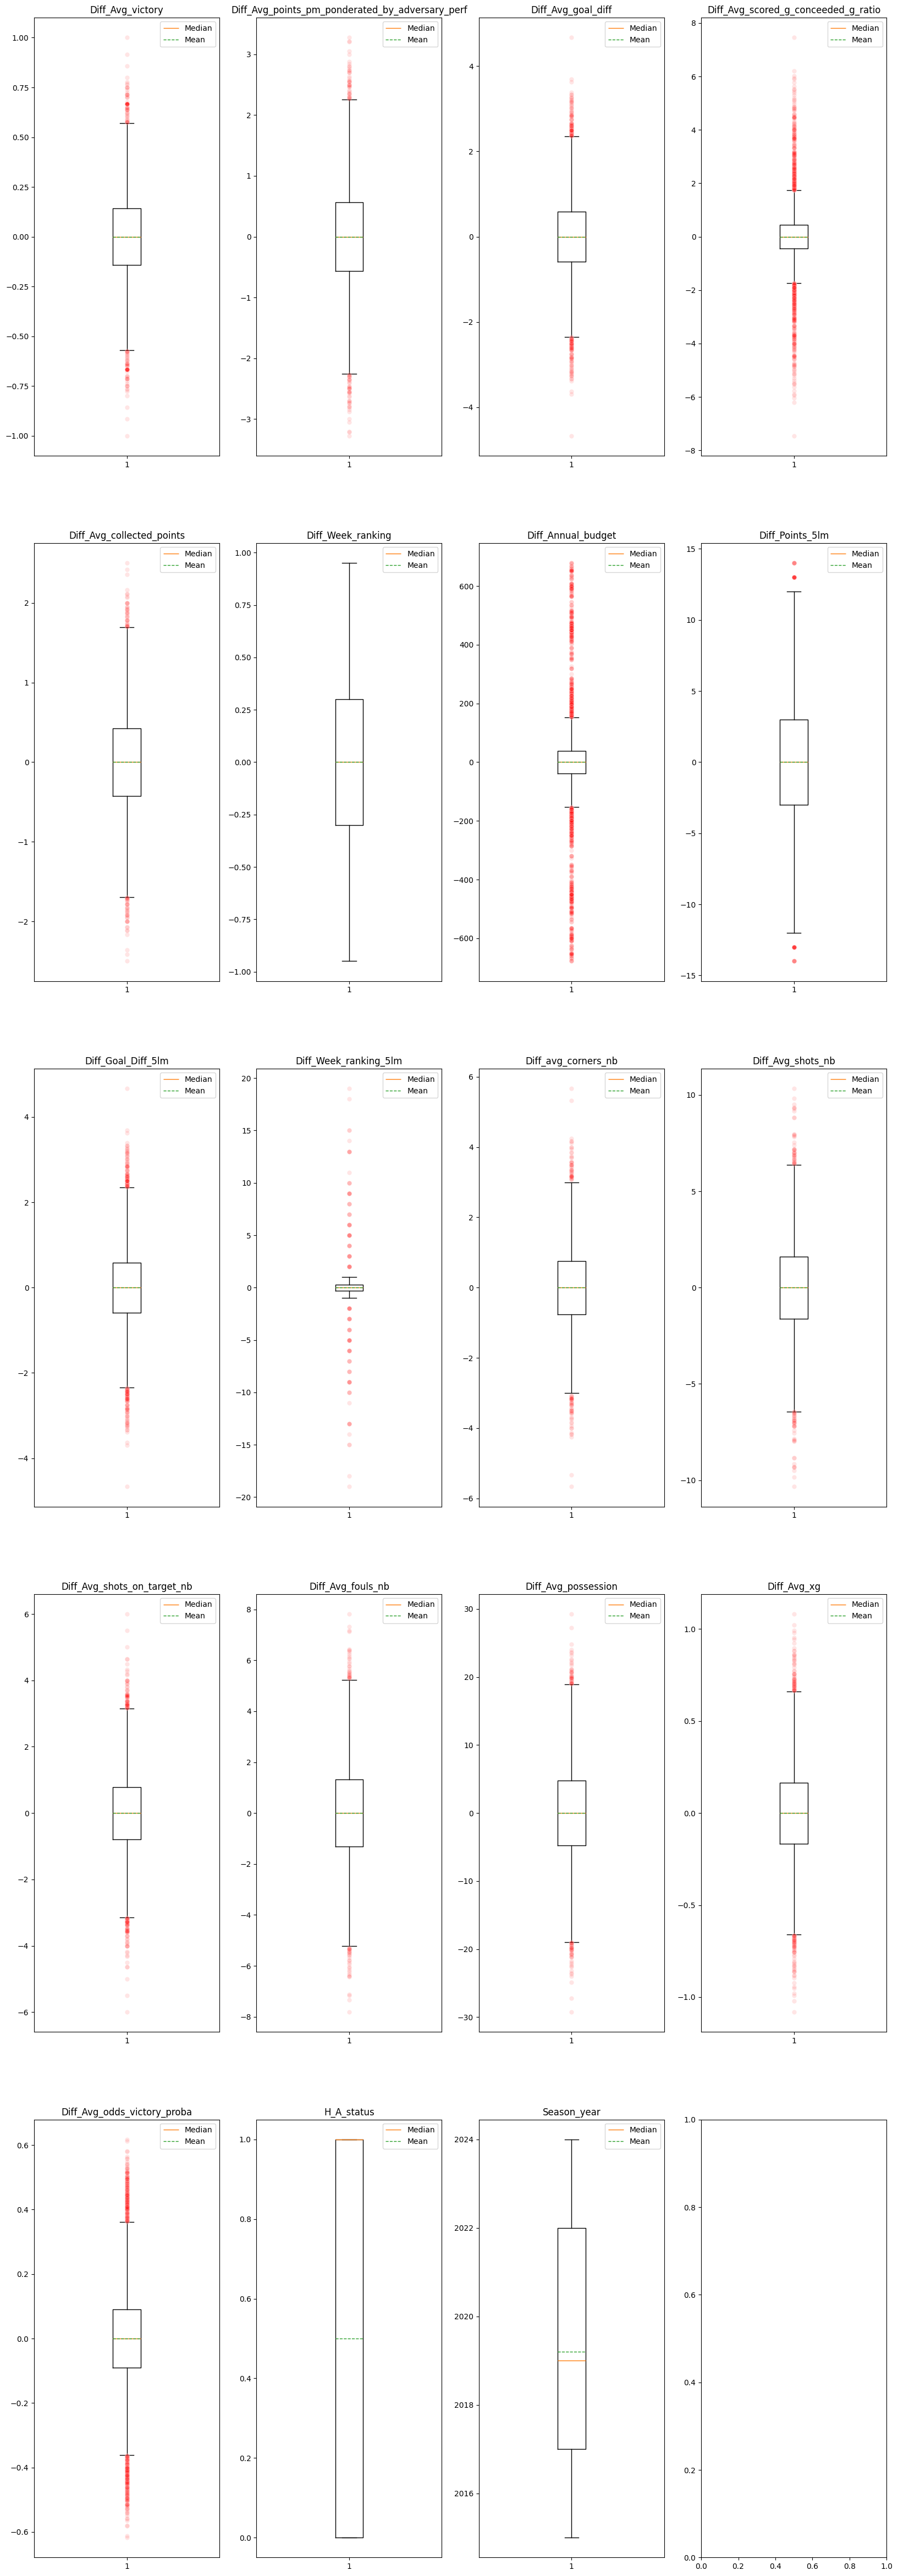

In [17]:
#src.visualization.visualize
from visualization import visualize
visualize.boxplot(dataset_restricted_2.copy())

<span style="color:#FF1493;"> <strong> <font size="4">3) Feature correlation heatmap

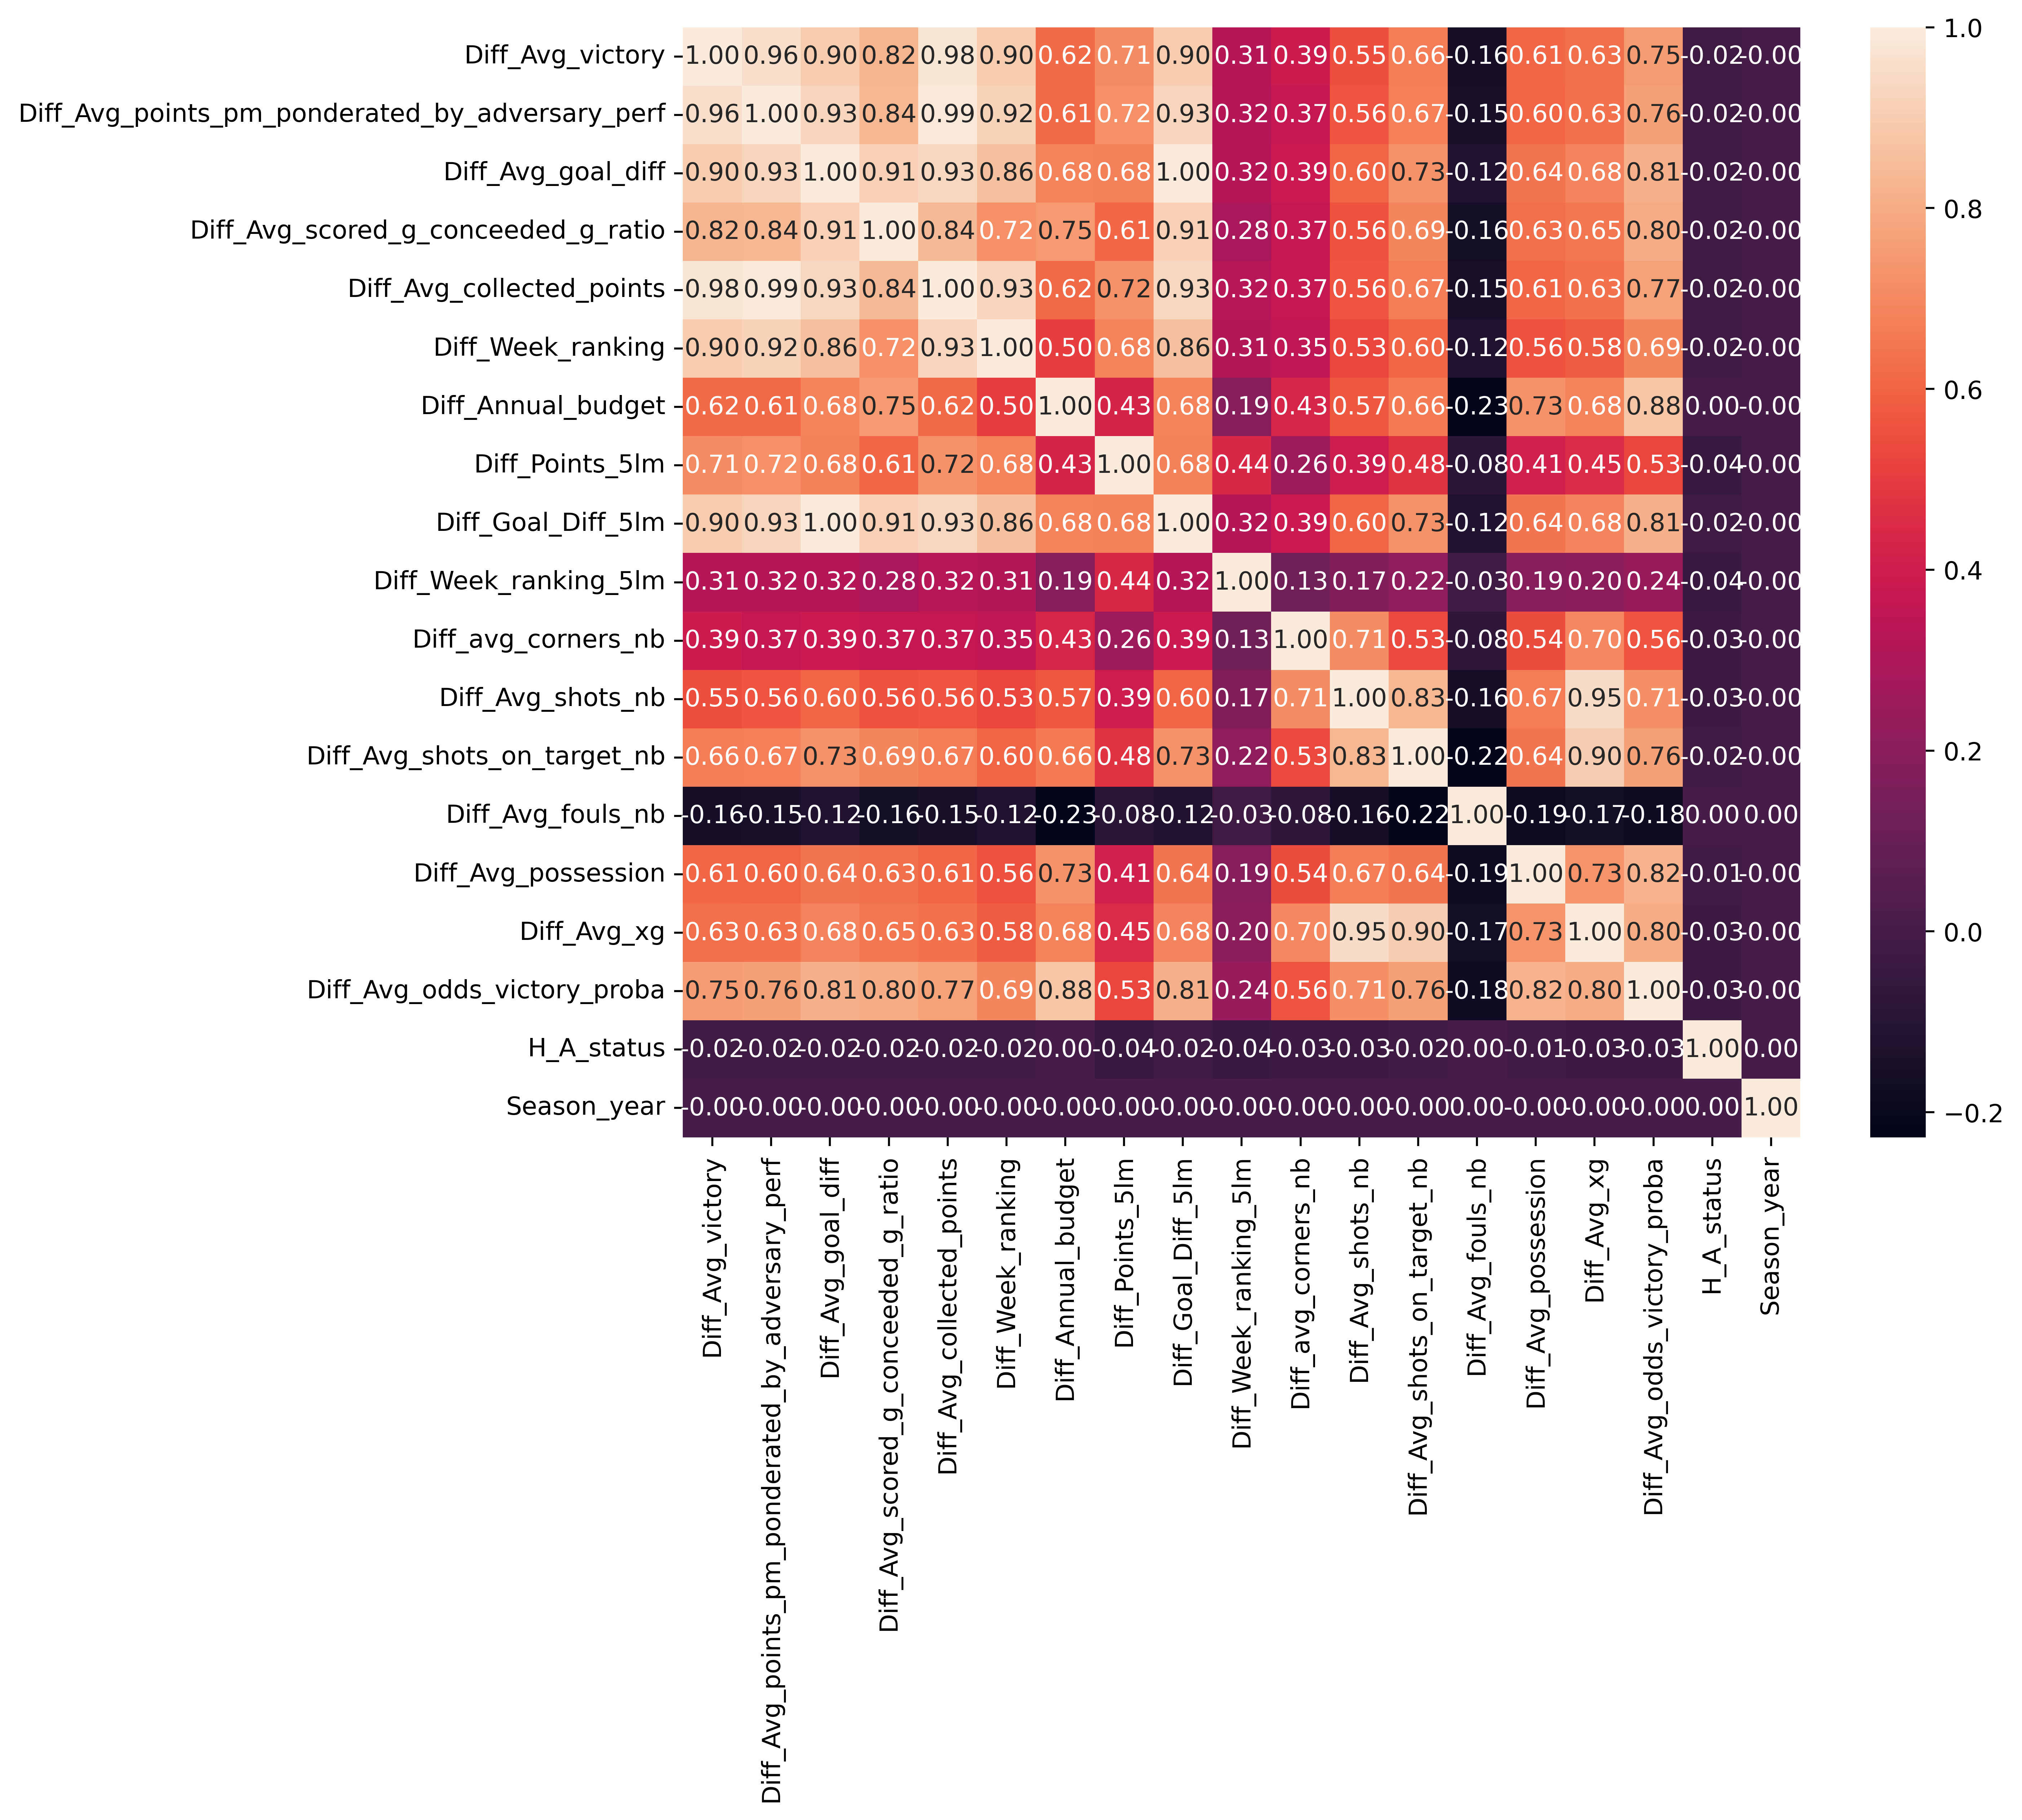

In [18]:
#src.visualization.visualize

visualize.heat_map(dataset_restricted_2.copy())

# V) <u> Preprocessing (out of pipeline)

<span style="color:#FF1493;"> <strong> <font size="4">1) Data Formatting and Splitting (definition of X and Y)

The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


No processed/not_split/X existing file to compare; treating as new dataset.
No old file to delete at:                     processed/not_split/X
Successfully saved the new dataframe:            processed/not_split/X


No processed/not_split/X_info existing file to compare; treating as new dataset.
No old file to delete at:                     processed/not_split/X_info
Successfully saved the new dataframe:            processed/not_split/X_info


No processed/not_split/Y existing file to compare; treating as new dataset.
No old file to delete at:                     processed/not_split/Y
Successfully saved the new dataframe:            processed/not_split/Y


The dataframes ARE the same for both old and new processed/split/X_train_info
Successfully deleted the old file:               processed/split/X_train_info
Successfully saved the new dataframe:            p

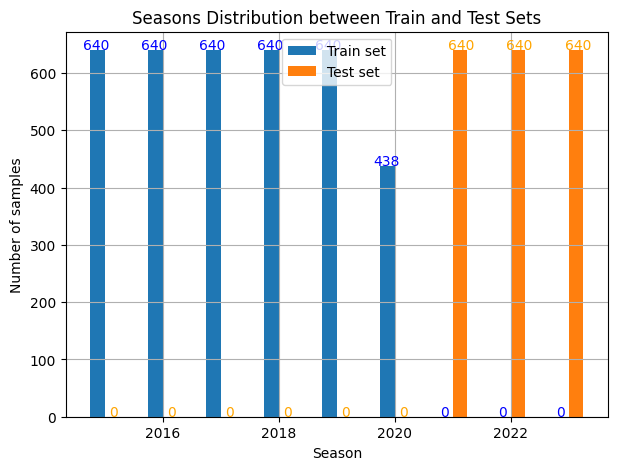

In [38]:
#src.data.preprocessing
from pyparsing import col

#Load the feat_engineered_ds:
feat_engineered_ds=make_dataset.load_data(True, 'interim/feat_engineered_ds')

# Define the col names we will put in X_train_00, X_test_00 pipeline with the names we will give the concatnenation of HT and AT

H_A_col_to_concat = [
    "date_GMT", "date_GMT",
    "Game Week", "Game Week",
    "home_team_name", "away_team_name",
    "away_team_name", "home_team_name",
    "Diff_HT_avg_victory_pm", "Diff_AT_avg_victory_pm", 
    "HT_Diff_points_ponderated_by_adversary_perf", "AT_Diff_points_ponderated_by_adversary_perf",
    "Diff_HT_goal_diff_pm","Diff_AT_goal_diff_pm",
    "Diff_HT_avg_scored_g_conceded_g_ratio","Diff_AT_avg_scored_g_conceded_g_ratio",
    "Diff_pnt_HT_ratio","Diff_pnt_AT_ratio",
    "Diff_HT_ranking","Diff_AT_ranking",
    "Diff_HT_annual_budget","Diff_AT_annual_budget",
    "HT_Diff_Points_5lm","AT_Diff_Points_5lm",
    "Diff_HT_goal_diff_pm","Diff_AT_goal_diff_pm",
    "Diff_HT_ranking_5lm","Diff_AT_ranking_5lm",
    "HT_Diff_avg_corners_nb","AT_Diff_avg_corners_nb",
    "HT_Diff_avg_shots_nb","AT_Diff_avg_shots_nb",
    "HT_Diff_avg_shots_on_target_nb","AT_Diff_avg_shots_on_target_nb",
    "HT_Diff_avg_fouls_nb","AT_Diff_avg_fouls_nb",
    "HT_Diff_avg_possession","AT_Diff_avg_possession",
    "HT_Diff_avg_xg","AT_Diff_avg_xg",
    "HT_Diff_avg_odds_victory_proba","AT_Diff_avg_odds_victory_proba",
    "HT_H_A_status", "AT_H_A_status", 
    "Season_year", "Season_year",
    "HT_played_matchs_nb", "AT_played_matchs_nb",
    "HTW_Max_odd", "ATW_Max_odd",
    "HTW_avg_odd", "ATW_avg_odd"
]

names_col_concatenated = [
    "Date",
    "Game Week",
    "Team_we_pred_vict_proba",
    "Adversary",
    "Diff_Avg_victory",
    "Diff_Avg_points_pm_ponderated_by_adversary_perf",
    "Diff_Avg_goal_diff", 
    "Diff_Avg_scored_g_conceeded_g_ratio",
    "Diff_Avg_collected_points", 
    "Diff_Week_ranking",
    "Diff_Annual_budget",
    "Diff_Points_5lm",
    "Diff_Goal_Diff_5lm",
    "Diff_Week_ranking_5lm",
    "Diff_avg_corners_nb",
    "Diff_Avg_shots_nb",
    "Diff_Avg_shots_on_target_nb",
    "Diff_Avg_fouls_nb",
    "Diff_Avg_possession",
    "Diff_Avg_xg",
    "Diff_Avg_odds_victory_proba",
    "H_A_status",
    "Season_year",
    "Played_matchs_nb",
    "Max_victory_odd",
    "Avg_victory_odd"
]

contextual_col = [
    "Team_we_pred_vict_proba",
    "Adversary",
    "Game Week",
    "Date",
    "Played_matchs_nb",
    "Max_victory_odd",
    "Avg_victory_odd"
]
                     
                    
# Define the names of the columns above that we don't want to include in X_train and X_test. (I know it's contradictory, but it's easier to simply add names here rather than deleting some in the two lists above and having to add them again if I change my mind.)
col_to_remove = [
    'Diff_Avg_odds_victory_proba',
    'Diff_Avg_victory',
    'Diff_Week_ranking' 
    ]


test_seasons = [2021,2022,2023]
train_seasons = [2015, 2016, 2017, 2018, 2019, 2020]


# Format and clean the feat_engineered_ds
X, X_info, Y = preprocessing.formatting_cleaning( H_A_col_to_concat, names_col_concatenated, col_to_remove, contextual_col, feat_engineered_ds.copy())

# Splitting (following seasons) the datasets into train and test datasets
X_train_info, X_train_00, Y_train_00, X_test_info,  X_test_00, Y_test_00 = preprocessing.splitting(X.copy(), X_info.copy(), Y.copy(), test_seasons, train_seasons, 270)


# Saving  the datasets
make_dataset.save_dataframe(X, 'processed/not_split/X')
make_dataset.save_dataframe(X_info, 'processed/not_split/X_info')
make_dataset.save_dataframe(Y, 'processed/not_split/Y')

make_dataset.save_dataframe(X_train_info, 'processed/split/X_train_info')
make_dataset.save_dataframe(X_train_00, 'processed/split/X_train_00')
make_dataset.save_dataframe(Y_train_00, 'processed/split/Y_train_00')
make_dataset.save_dataframe(X_test_info, 'processed/split/X_test_info')
make_dataset.save_dataframe(X_test_00, 'processed/split/X_test_00')
make_dataset.save_dataframe(Y_test_00, 'processed/split/Y_test_00')
   
# Visualize the seasons repartition in train, valid, test sets.
preprocessing.hist_seasons(X_train_00.copy(), X_test_00.copy(),)


<span style="color:#FF1493;"> <strong> <font size="4">3) Filter and Wrapper features selection (version out of the pipeline)

In [ ]:
#src.features.features_selection

#This cell is made to test features selectors (Filter and Wrrapper), and conducting feature selection. We do it OUT OF THE PIPELINE beacause the execution of these features selectors significantly slow down the process (particularly for wrapper).
#Les tests doivent être faits sur X_train

#Wrapper features selection
#On définit le model qui va etre utilisé pour definir l'ultilité des features et qui va permettre de les sélectionner
from sklearn.linear_model import LogisticRegression
model_tester = LogisticRegression(max_iter=10000, C = 0.01, penalty = 'l2')
"""
X_wrapped = features_selection.wrapper_features_selection(X_train_00.copy(),Y_train_00.copy(), model_tester)
"""


#Filter features selection
from sklearn.feature_selection import f_classif
"""
X_filtered = features_selection.filter_features_selection(X_train_00.copy(),Y_train_00.copy(), 15, f_classif, True)
"""


'\nX_filtered = features_selection.filter_features_selection(X_train_00.copy(),Y_train_00.copy(), 15, f_classif, True)\n'

<span style="color:#808080;"> <strong> <font size="4">4) Outliers treatment (not used but kept in case...)

In [ ]:
#src.data.preprocessing

#Deletting outliers frome train set
"""X_train_01, Y_train_01 = preprocessing.outliers_removal(X_0 = X_train_00.copy(), Y_0 = Y_train_00.copy(), iqr_multiplier = 1.9)"""

'X_train_01, Y_train_01 = preprocessing.outliers_removal(X_0 = X_train_00.copy(), Y_0 = Y_train_00.copy(), iqr_multiplier = 1.9)'

# VI) <u> Pipeline development 

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline and GridSearchCV implementation

In [ ]:

# --------------------------------------------------------------
# Correlated features remover (not used)
# --------------------------------------------------------------
#Correlated features remover definition (it's a transformer)
corr_features_selector = features_selection.correlated_features_removal_transformer(corr_threshold = 0.95)
"""

# --------------------------------------------------------------
# Features selector
# --------------------------------------------------------------

#model_sfs = LogisticRegression(max_iter=10000, C = 0.3, random_state =33, penalty = 'l2')
#sequ_feat_selector = SFS(estimator = model_sfs, k_features = 'best', forward = True, verbose = 0, cv=CV, scoring = 'neg_log_loss', n_jobs = -1)

#OU

#Filter features selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
filter_feat_selector = SelectKBest(f_classif, k= 10)

# --------------------------------------------------------------
# Scaler
# --------------------------------------------------------------

from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler()


# --------------------------------------------------------------
# Model
# --------------------------------------------------------------
model = LogisticRegression(penalty = 'l1', fit_intercept=True, random_state = 999, solver = 'saga', max_iter= 3000, verbose = False, tol=1e-4)

# --------------------------------------------------------------
# Pipeline
# --------------------------------------------------------------
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[("scaler",scaler), ("features_selector",filter_feat_selector), ("model", model)])


#parameters to optimize definition
import numpy as np
parameters = {'model__penalty': ['l1', 'l2', 'elasticnet', 'None'],
             'model__C': np.logspace(-3, 1, 21),
             'model__solver': ['saga', 'sag', 'liblinear', 'newton-cg', 'lbfgs'],
             'features_selector__k' : [5,8,10,11,12,14,15,16,17]
             }

# --------------------------------------------------------------
# GridSearchCV
# --------------------------------------------------------------
# Create a GridSearchCV object
from sklearn.model_selection import GridSearchCV
from configuration import constant_variables

grid_search = GridSearchCV(pipeline, parameters, cv=constant_variables.CV, scoring = 'neg_log_loss', verbose=0)
# Fit the GridSearchCV to the data
grid_search.fit(X_train_00.copy(), Y_train_00.copy().values.ravel())
"""



'\n\n# --------------------------------------------------------------\n# Features selector\n# --------------------------------------------------------------\n\n#model_sfs = LogisticRegression(max_iter=10000, C = 0.3, random_state =33, penalty = \'l2\')\n#sequ_feat_selector = SFS(estimator = model_sfs, k_features = \'best\', forward = True, verbose = 0, cv=CV, scoring = \'neg_log_loss\', n_jobs = -1)\n\n#OU\n\n#Filter features selection\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_classif\nfilter_feat_selector = SelectKBest(f_classif, k= 10)\n\n# --------------------------------------------------------------\n# Scaler\n# --------------------------------------------------------------\n\nfrom sklearn.preprocessing import RobustScaler, StandardScaler\nscaler = StandardScaler()\n\n\n# --------------------------------------------------------------\n# Model\n# --------------------------------------------------------------\nmodel = LogisticRegress

<span style="color:#FF1493;"> <strong> <font size="4">2) Display GridSearchCV results

In [ ]:
#src.pipeline.results

from pipeline import results
"""
#We print the results of GridSearchCV() execution
results.GridSearchCV_results(grid_search, X_train_00.copy())

"""

'\n#We print the results of GridSearchCV() execution\nresults.GridSearchCV_results(grid_search, X_train_00.copy())\n\n'

<span style="color:#FF1493;"> <strong> <font size="4">3) Model, features, scaler selection


In [ ]:
#src.pipeline.model
from pipeline import model
from features.features_selection import restricted_datasets


"""
#On récupère la pipeline avec ses parametres optimaux 
chosen_pipeline = grid_search.best_estimator_
print(chosen_pipeline)

X_train_01 = X_train_00.copy()
X_test_01 = X_test_00.copy()

chosen_pipeline_trained = chosen_pipeline.fit(X_train_01.copy(), Y_train_00.copy().values.ravel())
"""
#On choisit une pipeline enregistrée dans pipeline.model et la selection de features qui va avec

chosen_pipeline = model.pipeline_03
chosen_features = model.features_selected_03

X_train_01 = X_train_00.copy()[chosen_features]
X_test_01 = X_test_00.copy()[chosen_features]

# Train the pipeline chosen
chosen_pipeline_trained = chosen_pipeline.fit(X_train_01.copy(), Y_train_00.copy().values.ravel())


<span style="color:#808080;"> <strong> <font size="4">4) Model calibration (Not used anymore)

In [ ]:

#definition of a calibrator
"""
from sklearn.calibration import CalibratedClassifierCV
calibrated_pipeline = CalibratedClassifierCV(chosen_pipeline_trained, cv = 'prefit' , method = 'isotonic', ensemble = True)
calibrated_pipeline.fit(X_valid_00.copy(), Y_valid_00.copy())
"""


"\nfrom sklearn.calibration import CalibratedClassifierCV\ncalibrated_pipeline = CalibratedClassifierCV(chosen_pipeline_trained, cv = 'prefit' , method = 'isotonic', ensemble = True)\ncalibrated_pipeline.fit(X_valid_00.copy(), Y_valid_00.copy())\n"

# VII) <u> Pipeline results study

<span style="color:#FF1493;"> <strong> <font size="4">1) Probabilities calibration and distribution study

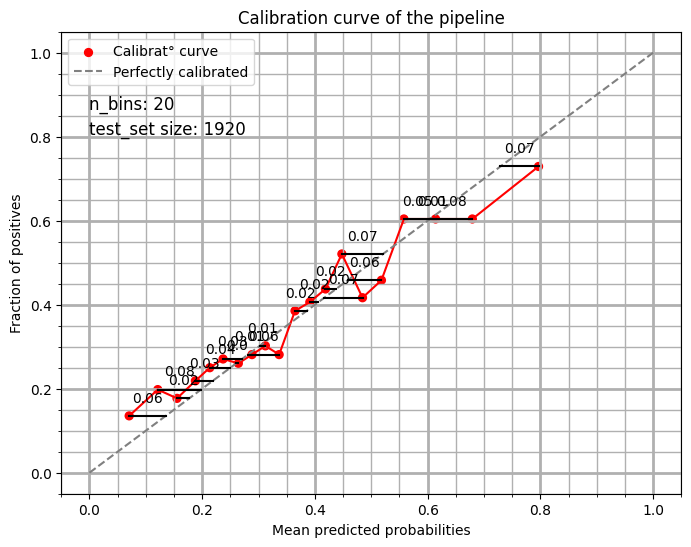

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.11]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.11, 0.14]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.14, 0.17]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.17, 0.2]    │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.2, 0.22]    │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.22, 0.25]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.25, 0.28]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.28, 0.3]    │                 

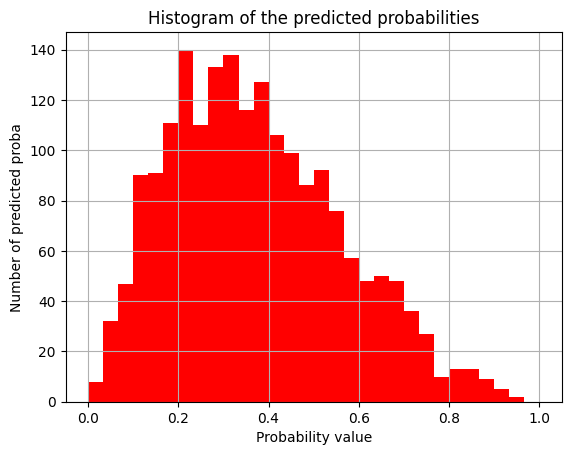

In [ ]:
#src.pipeline.results
from pipeline import results
from sklearn.base import clone


#Make proba predictions retraining the pipeline at every Game Week or every Season:
chosen_features = X_train_01.columns
formatting_splitting_args_2 = preprocessing.formatting_splitting_args()

proba_pred_GW_training, Y_test_00_GW_training, X_info_GW_training = results.proba_prediction_retrained_each_seas(H_A_col_to_concat,
names_col_concatenated,
col_to_remove,
contextual_col,
clone(chosen_pipeline),
chosen_features,
test_seasons,
'seas',
feat_engineered_ds.copy())

#Make 'normal' proba predictions on the test_seasons (defined in V)1) )
normal_proba_pred = chosen_pipeline_trained.predict_proba(X_test_01)[:,1]

Y_test_01 = Y_test_00_GW_training
proba_pred = proba_pred_GW_training


#Plot Calibration curve of the pipeline and info about its bins
prob_pred_01, prob_true_01 = results.plot_calibration_curve_2(
                                Y_test_0 = Y_test_01.copy(),
                                X_train_0 = X_train_01.copy(),
                                proba_pred_0 = proba_pred.copy(),
                                n_bins_0 = 20,
                                strategy_0 = 'quantile',
                                color_0 = 'red',
                                GW_training_or_not = True)

#We display statistics on the pipeline probabilities deviation 
results.print_calibration_stats(prob_pred_01.copy(),
                                prob_true_01.copy(),
                                'non calibrated')

#We plot the histogram of the proba predicted by the non calibrated pipeline
results.plot_histo_predicted_proba(proba_pred.copy(), 30, 'r', 'predicted probabilities')

# Display the ratio (probabilities pred/nb of true targets)
results.ratio_proba__sum_true_target(X_train_01.copy(), Y_train_00.copy(), X_test_01.copy(), Y_test_00.copy(), chosen_pipeline_trained)


<span style="color:#FF1493;"> <strong> <font size="4">2) Probabilities calibration and distribution study depending on different parameters

Calibration curve of proba predicted on matches where Played_matches_nb C [ 6 , 21 ]


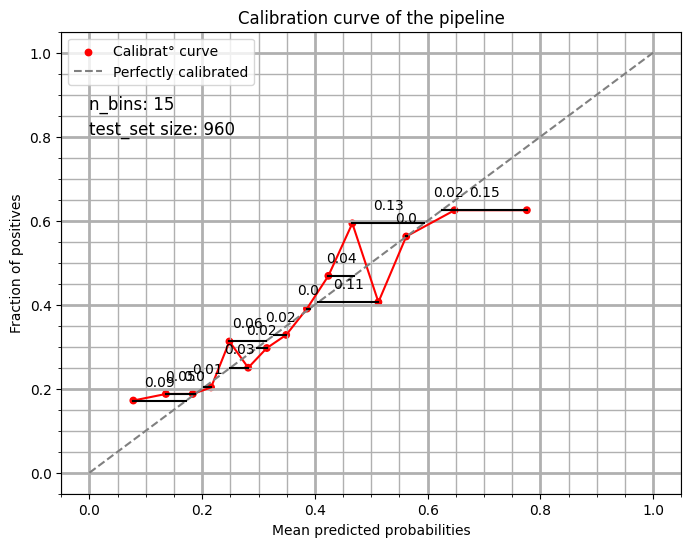

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.11]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.11, 0.16]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.16, 0.2]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.2, 0.23]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.23, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.3]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.3, 0.33]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.33, 0.37]   │                 

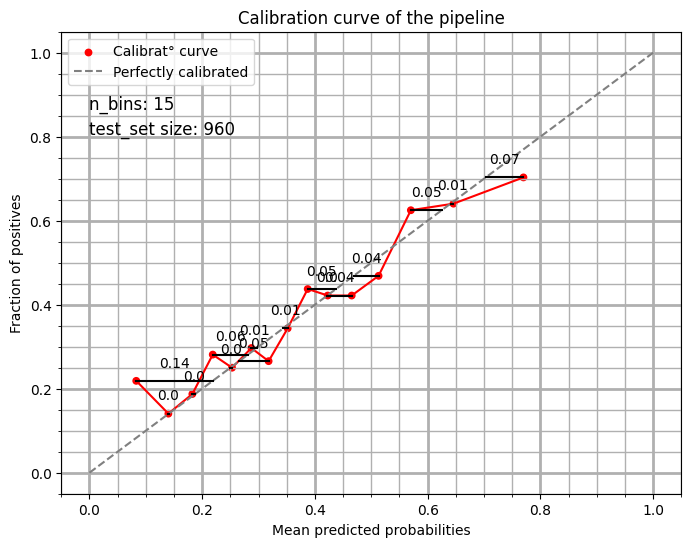

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.12]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.12, 0.16]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.16, 0.2]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.2, 0.23]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.23, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.3]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.3, 0.33]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.33, 0.37]   │                 

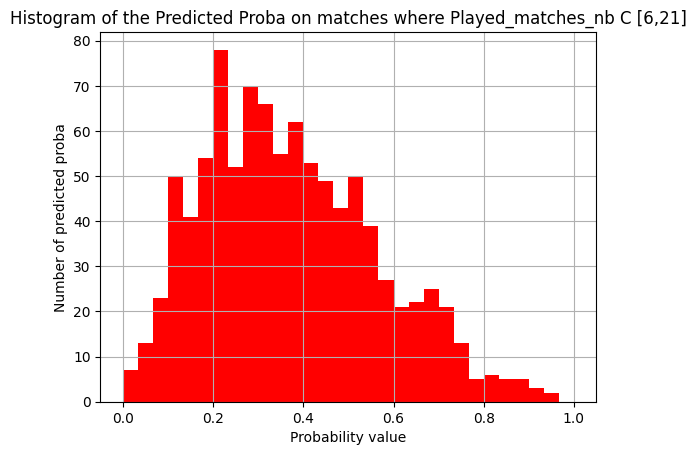

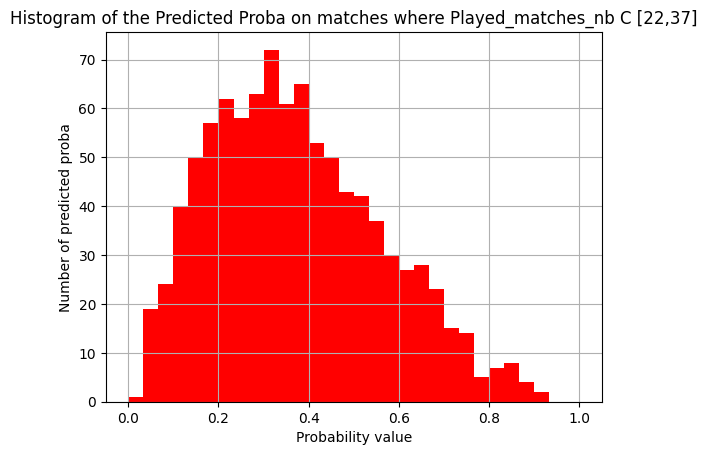

In [ ]:
#src.pipeline.results

# We divide the dataframe in n subdataframes classified following the nb of played matches
subdatasets = results.calibration_over_season_advancement(2, X_info_GW_training, proba_pred_GW_training, Y_test_00_GW_training)

#Plot Calibration curves for each of these dataframes
results.calibration_curves_subdataframes(subdatasets, 15, 30, True)



<span style="color:#FF1493;"> <strong> <font size="4">3) Model coefficients study

In [ ]:
#src.pipeline.results
results.features_coeff_report(chosen_pipeline_trained, X_train_01)

[[ 0.10018356  0.15115087 -0.12287793  0.03344592  0.22426076  0.04133386
   0.15115087  0.05448999  0.04244884  0.04194004 -0.05178468  0.18070542
   0.02566891  0.42957842]]
╒═════════════════════════════════════════════════╤═══════════════╕
│ Feature                                         │   Coefficient │
╞═════════════════════════════════════════════════╪═══════════════╡
│ Diff_Avg_points_pm_ponderated_by_adversary_perf │     0.100184  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_goal_diff                              │     0.151151  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_scored_g_conceeded_g_ratio             │    -0.122878  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_collected_points                       │     0.0334459 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Annual_budget                              │     0.224261  │
├───────

# VIII) <u> Learning curves

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline learning curve

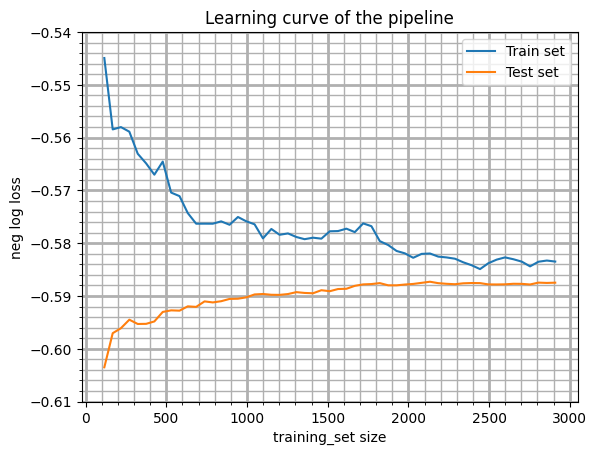

In [ ]:
#src.visualization.learning_curves

from visualization import learning_curves

# Plot learning curves for our pipeline
learning_curves.pipeline_learning_curve(X_train_01.copy(),
                                        Y_train_00.copy(),
                                        chosen_pipeline,
                                        'neg_log_loss')

<span style="color:#FF1493;"> <strong> <font size="4">2) Calibration curves depending on train set size

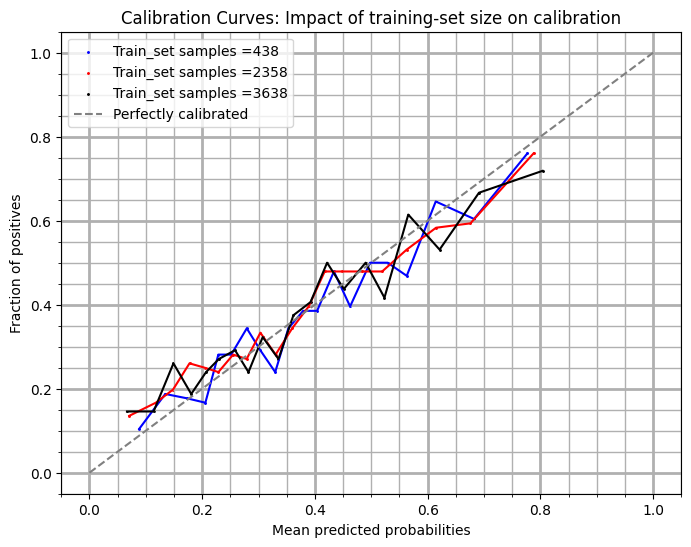

╒════╤═════════════════════════╤════════════════════════╕
│    │ Curve label             │   Curves avg deviation │
╞════╪═════════════════════════╪════════════════════════╡
│  0 │ Train_set samples =438  │              0.037906  │
├────┼─────────────────────────┼────────────────────────┤
│  1 │ Train_set samples =2358 │              0.0374752 │
├────┼─────────────────────────┼────────────────────────┤
│  2 │ Train_set samples =3638 │              0.0472009 │
╘════╧═════════════════════════╧════════════════════════╛


In [ ]:
#src.visualization.learning_curves


# We create the subsets (with different train size) used to plot the different learning curves:

# PRECISE PARTITIONNING (30 matchs precision)
     #  I decided not to waste time designing a function for precise partionning. I manually generated test curves that I put in ClickUp


# WIDE PARTITIONNING (1 season precision)
X_train_lc, Y_train_lc, X_test_lc, Y_test_lc = learning_curves.data_formatting_partitionning_seasonally(H_A_col_to_concat,
names_col_concatenated,
col_to_remove,
contextual_col,
feat_engineered_ds.copy(), 
[2021,2022,2023], 
[[2020],[2017,2018,2019,2020],  [2015,2016,2017,2018,2019,2020]],
chosen_features)


# Plot the pipeline's learning curves for the different sizes of train_set
learning_curves.pipeline_calibration_learning_curve(X_train_lc.copy(), X_test_lc.copy(), Y_train_lc.copy(), Y_test_lc.copy(), clone(chosen_pipeline), 20, 'quantile')

<span style="color:#808080;"> <strong> <font size="4">3) Calibrator learning curve (not used anymore)

In [ ]:
#src.visualization.learning_curves

# Plot the learning curve for the calibrator
"""
learning_curves.learning_curve_calibrator(nb_test_sets_sizes = 25,
                                          X_test_0 = X_test_00.copy(),
                                          X_valid_0 = X_valid_00.copy(),
                                          Y_test_0 = Y_test_00.copy(),
                                          Y_valid_0 = Y_valid_00.copy(),
                                          test_size_0 = 0.6,
                                          pipe_0 = chosen_pipeline_trained,
                                          n_bins_0 = 15,
                                          cross_val_nb = 25)"""

'\nlearning_curves.learning_curve_calibrator(nb_test_sets_sizes = 25,\n                                          X_test_0 = X_test_00.copy(),\n                                          X_valid_0 = X_valid_00.copy(),\n                                          Y_test_0 = Y_test_00.copy(),\n                                          Y_valid_0 = Y_valid_00.copy(),\n                                          test_size_0 = 0.6,\n                                          pipe_0 = chosen_pipeline_trained,\n                                          n_bins_0 = 15,\n                                          cross_val_nb = 25)'

# IX) <u> Final tests

<span style="color:#FF1493;"> <strong> <font size="4">1) Comparaison of predicted proba with bookmakers proba

In [ ]:
#src.pipeline.results

# Compare predicted proba and odds proba
odd_proba_pred_proba_compa_dataset = results.compare_pred_proba_and_odds(proba_pred_GW_training.copy() ,X_info_GW_training.copy())
display(odd_proba_pred_proba_compa_dataset)

Team_we_pred_vict_proba    Adversary                Date  \
0                      Dijon       Rennes 2020-10-16 17:00:00   
1                      Nîmes          PSG 2020-10-16 19:00:00   
2                      Reims      Lorient 2020-10-17 15:00:00   
3                  Marseille     Bordeaux 2020-10-17 19:00:00   
4                 Strasbourg         Lyon 2020-10-18 11:00:00   
5                     Angers         Metz 2020-10-18 13:00:00   
6                     Monaco  Montpellier 2020-10-18 13:00:00   
7                     Nantes        Brest 2020-10-18 13:00:00   
8                 St Etienne         Nice 2020-10-18 15:00:00   
9                      Lille         Lens 2020-10-18 19:00:00   
10                    Rennes       Angers 2020-10-23 19:00:00   
11                   Lorient    Marseille 2020-10-24 15:00:00   
12                       PSG        Dijon 2020-10-24 19:00:00   
13                  Bordeaux        Nîmes 2020-10-25 14:00:00   
14                     Brest   Strasbourg 2020-10-25 14:00:00   
15                      Metz   St Etienne 2020-10-25 14:00:00   
16               Montpellier        Reims 2020-10-25 14:00:00   
17                      Nice        Lille 2020-10-25 16:00:00   
18                      Lyon       Monaco 2020-10-25 20:00:00   
19                    Rennes        Brest 2020-10-31 16:00:00   
20                    Nantes          PSG 2020-10-31 20:00:00   
21                St Etienne  Montpellier 2020-11-01 12:00:00   
22                    Angers         Nice 2020-11-01 14:00:00   
23                     Dijon      Lorient 2020-11-01 14:00:00   
24                     Nîmes         Metz 2020-11-01 14:00:00   
25                     Reims   Strasbourg 2020-11-01 14:00:00   
26                    Monaco     Bordeaux 2020-11-01 16:00:00   
27                     Lille         Lyon 2020-11-01 20:00:00   
28                Strasbourg    Marseille 2020-11-06 20:00:00   
29                  Bordeaux  Montpellier 2020-11-07 16:00:00   
30                       PSG       Rennes 2020-11-07 20:00:00   
31                     Brest        Lille 2020-11-08 12:00:00   
32                      Lens        Reims 2020-11-08 14:00:00   
33                   Lorient       Nantes 2020-11-08 14:00:00   
34                      Metz        Dijon 2020-11-08 14:00:00   
35                     Nîmes       Angers 2020-11-08 14:00:00   
36                      Nice       Monaco 2020-11-08 16:00:00   
37                      Lyon   St Etienne 2020-11-08 20:00:00   
38                    Rennes     Bordeaux 2020-11-20 18:00:00   
39                    Monaco          PSG 2020-11-20 20:00:00   
40                     Brest   St Etienne 2020-11-21 16:00:00   
41                    Nantes         Metz 2020-11-22 12:00:00   
42                     Dijon         Lens 2020-11-22 14:00:00   
43               Montpellier   Strasbourg 2020-11-22 14:00:00   
44                     Reims        Nîmes 2020-11-22 14:00:00   
45                    Angers         Lyon 2020-11-22 16:00:00   
46                     Lille      Lorient 2020-11-22 20:00:00   
47                      Lens       Nantes 2020-11-25 18:00:00   
48                Strasbourg       Rennes 2020-11-27 20:00:00   
49                 Marseille       Nantes 2020-11-28 16:00:00   
50                       PSG     Bordeaux 2020-11-28 20:00:00   
51                      Lyon        Reims 2020-11-29 12:00:00   
52                      Lens       Angers 2020-11-29 14:00:00   
53                   Lorient  Montpellier 2020-11-29 14:00:00   
54                      Metz        Brest 2020-11-29 14:00:00   
55                    Monaco        Nîmes 2020-11-29 14:00:00   
56                      Nice        Dijon 2020-11-29 16:00:00   
57                St Etienne        Lille 2020-11-29 20:00:00   
58                     Nîmes    Marseille 2020-12-04 20:00:00   
59                    Rennes         Lens 2020-12-05 16:00:00   
60               Montpellier          PS

In [ ]:
col_to_display = ['home_team_name','away_team_name', 'Game Week', 'date_GMT', 'HTW_Max_odd','odds_ft_home_team_win', 'HTW_avg_odd']
col_to_disp_1 = feat_engineered_ds.loc[feat_engineered_ds['HTW_Max_odd']/feat_engineered_ds['HTW_avg_odd'] < 1.05, col_to_display].copy()
col_to_disp_2 = col_to_disp_1.loc[(col_to_disp_1['odds_ft_home_team_win'] != 9.99) & (col_to_disp_1['odds_ft_home_team_win'] != 0.00)].copy()

col_to_disp_2['HTW_max_proba'] = (1/col_to_disp_2['HTW_Max_odd'])
col_to_disp_2['HTW_avg_proba'] = (1/col_to_disp_2['HTW_avg_odd'])

col_to_disp_2['ratio'] = col_to_disp_2['HTW_max_proba'] - col_to_disp_2['HTW_avg_proba']
display(col_to_disp_2)

home_team_name   away_team_name  Game Week            date_GMT  \
4               Lille             Metz          1 2014-08-09 19:00:00   
6              Nantes             Lens          1 2014-08-09 19:00:00   
8                Lyon           Rennes          1 2014-08-10 15:00:00   
9              Monaco          Lorient          1 2014-08-10 19:00:00   
11                PSG           Bastia          2 2014-08-16 15:00:00   
15             Rennes            Evian          2 2014-08-16 18:00:00   
16           Toulouse             Lyon          2 2014-08-16 18:00:00   
17          Marseille      Montpellier          2 2014-08-17 15:00:00   
23              Lille          Lorient          3 2014-08-23 18:00:00   
24        Montpellier             Metz          3 2014-08-23 18:00:00   
27               Lyon             Lens          3 2014-08-24 12:00:00   
28         St Etienne           Rennes          3 2014-08-24 15:00:00   
30          Marseille             Nice          4 2014-08-29 18:30:00   
33               Lens            Reims          4 2014-08-30 18:00:00   
34            Lorient         Guingamp          4 2014-08-30 18:00:00   
35             Nantes      Montpellier          4 2014-08-30 18:00:00   
36           Toulouse            Evian          4 2014-08-30 18:00:00   
37           Bordeaux           Bastia          4 2014-08-31 12:00:00   
39                PSG       St Etienne          4 2014-08-31 19:00:00   
46         St Etienne             Caen          5 2014-09-13 18:00:00   
47              Lille           Nantes          5 2014-09-14 12:00:00   
50           Bordeaux            Evian          6 2014-09-19 18:30:00   
51          Marseille           Rennes          6 2014-09-20 15:00:00   
53               Metz           Bastia          6 2014-09-20 18:00:00   
54             Nantes             Nice          6 2014-09-20 18:00:00   
56              Lille      Montpellier          6 2014-09-21 12:00:00   
58             Monaco         Guingamp          6 2014-09-21 15:00:00   
59                PSG             Lyon          6 2014-09-21 19:00:00   
72              Lille           Bastia          8 2014-09-27 18:00:00   
73            Lorient            Evian          8 2014-09-27 18:00:00   
76           Bordeaux           Rennes          8 2014-09-28 12:00:00   
79          Marseille       St Etienne          8 2014-09-28 19:00:00   
83              Evian             Metz          9 2014-10-04 18:00:00   
85             Rennes             Lens          9 2014-10-04 18:00:00   
86         St Etienne         Toulouse          9 2014-10-05 12:00:00   
89                PSG           Monaco          9 2014-10-05 19:00:00   
92              Lille         Guingamp         10 2014-10-18 18:00:00   
94             Monaco            Evian         10 2014-10-18 18:00:00   
96               Nice           Bastia         10 2014-10-18 18:00:00   
97          Marseille         Toulouse         10 2014-10-19 12:00:00   
98           Bordeaux             Caen         10 2014-10-19 15:00:00   
99               Lyon      Montpellier         10 2014-10-19 19:00:00   
101               PSG         Bordeaux         11 2014-10-25 15:00:00   
103              Caen          Lorient         11 2014-10-25 18:00:00   
112          Guingamp           Bastia         12 2014-11-01 19:00:00   
115       Montpellier            Evian         12 2014-11-01 19:00:00   
118          Bordeaux         Toulouse         12 2014-11-02 16:00:00   
120            Rennes          Lorient         13 2014-11-07 19:30:00   
124             Evian             Nice         13 2014-11-08 19:00:00   
125          Toulouse             Metz         13 2014-11-08 19:00:00   
126              Lyon         Guingamp         13 2014-11-09 13:00:00   
133           Lorient             Lens         14 2014-11-22 19:00:00   
134            Monaco             Caen         14 2014-11-22 19:00:00   
135              Nice            Reims         14 2014-11-22 19:0

<span style="color:#FF1493;"> <strong> <font size="4">2) Simulation of betting

In [ ]:
#src.pipeline.results

results_dataset = results.betting_simulation(dataset_0 = odd_proba_pred_proba_compa_dataset.copy(),
                           Y_0 = Y_test_00_GW_training,
                           proba_interval_0 = [0.2, 0.5],
                           min_diff_with_odd_proba_0 = 0.09,
                           GW_interval_0 = [6, 37],
                           bet_0 = 10)

display(results_dataset)

The final gain is 62.5 € , betting on 49 matches, out of 1920
This is equivalent to a ratio gain/bet = 0.12755102040816327


Team_we_pred_vict_proba    Adversary                Date  \
17                      Nice        Lille 2020-10-25 16:00:00   
35                     Nîmes       Angers 2020-11-08 14:00:00   
39                    Monaco          PSG 2020-11-20 20:00:00   
87                    Rennes    Marseille 2020-12-16 20:00:00   
90                      Nice         Lyon 2020-12-19 20:00:00   
91                     Brest  Montpellier 2020-12-20 12:00:00   
133                     Nice     Bordeaux 2021-01-17 14:00:00   
142                    Dijon   Strasbourg 2021-01-24 14:00:00   
145                   Rennes        Lille 2021-01-24 16:00:00   
158                     Metz  Montpellier 2021-02-03 18:00:00   
172                     Nice       Angers 2021-02-07 14:00:00   
198                    Nîmes      Lorient 2021-02-24 18:00:00   
205                    Nîmes       Nantes 2021-02-28 14:00:00   
211                     Metz       Angers 2021-03-03 18:00:00   
232                     Nice    Marseille 2021-03-20 16:00:00   
244                 Bordeaux   Strasbourg 2021-04-04 13:00:00   
250                     Metz        Lille 2021-04-09 19:00:00   
266                    Nîmes   Strasbourg 2021-04-18 13:00:00   
273                     Nice  Montpellier 2021-04-25 11:00:00   
290                     Lens        Lille 2021-05-07 19:00:00   
298                    Reims       Monaco 2021-05-09 15:05:00   
300                 Bordeaux         Lens 2021-05-16 19:00:00   
301                    Dijon       Nantes 2021-05-16 19:00:00   
310                   Angers        Lille 2021-05-23 19:00:00   
319               Strasbourg      Lorient 2021-05-23 19:00:00   
623                     Metz      Lorient 2021-05-16 19:00:00   
635              Montpellier       Nantes 2021-05-23 19:00:00   
658                 Clermont       Monaco 2021-09-26 15:00:00   
689                Marseille          PSG 2021-10-24 18:45:00   
760                 Bordeaux        Lille 2021-12-22 20:00:00   
931                    Lille       Monaco 2022-05-06 19:00:00   
932                    Brest   Strasbourg 2022-05-07 15:00:00   
965                 Clermont       Rennes 2021-09-22 17:00:00   
987                Marseille        Lille 2021-10-03 15:00:00   
1077               Marseille   Strasbourg 2021-12-12 16:00:00   
1110               Marseille         Lens 2022-01-22 20:00:00   
1262                  Angers         Metz 2022-05-14 19:00:00   
1267                   Reims   St Etienne 2022-05-14 19:00:00   
1291             Montpellier   Strasbourg 2022-09-17 15:00:00   
1548                Toulouse         Lens 2023-05-02 19:00:00   
1557                  Nantes   Strasbourg 2023-05-07 13:00:00   
1577                  Troyes   Strasbourg 2023-05-21 13:00:00   
1578                 Lorient         Lens 2023-05-21 15:05:00   
1593                 Lorient   Strasbourg 2023-06-03 19:00:00   
1597                   Brest       Rennes 2023-06-03 19:00:00   
1605             Montpellier       Angers 2022-09-11 13:00:00   
1610                 Lorient      Auxerre 2022-09-16 19:00:00   
1636                  Troyes         Nice 2022-10-09 13:00:00   
1706                  Troyes   Strasbourg 2023-01-02 14:00:00   

      Played_matchs_nb  Max_victory_odd  Avg_victory_odd  Proba pred  \
17                   7             3.54             3.33    0.428103   
35                   9             3.15             3.01    0.429030   
39                  10             5.95             5.28    0.276362   
87                  14             2.60             2.50    0.496488   
90                  14             6.50             5.50    0.270528   
91                  15             3.13             2.99    0.416933   
133                 18             2.50             2.36    0.498603   
142                 19             3.86             3.68    0.363404   
145                 20             2.90             2.78    0.455835   
158                 22            

<span style="color:#808080;"> <strong> <font size="4">1) Raw data importation

In [ ]:
# convert csv file into dataframe
# Footy dataset
R_footy_dataset = make_dataset.read_data([make_dataset.footy_2024_adr], 'footy')
# Football-Data dataset
R_football_data_dataset = make_dataset.read_data([make_dataset.football_data_2024_adr], 'football data')


# Uniformise teams names
R_dataset_football_data_02, R_dataset_footy_02 = data_combination.team_names_uniformisation(R_football_data_dataset.copy(), R_footy_dataset.copy())

# Replace Footy Stats shots by the values of Football Data
R_dataset_footy_03 = data_combination.replace_col_values('home_team_shots', 'HS', R_dataset_footy_02.copy(), R_dataset_football_data_02.copy())
R_dataset_footy_04 = data_combination.replace_col_values('away_team_shots', 'AS', R_dataset_footy_03.copy(), R_dataset_football_data_02.copy())
# Replace Footy Stats shots_on_target by the values of Football Data
R_dataset_footy_05 = data_combination.replace_col_values('home_team_shots_on_target', 'HST', R_dataset_footy_04.copy(), R_dataset_football_data_02.copy())
R_dataset_footy_06 = data_combination.replace_col_values('away_team_shots_on_target', 'AST', R_dataset_footy_05.copy(), R_dataset_football_data_02.copy())

R_dataset_01 = R_dataset_footy_06

#We create the new columns in dataset and stock the columns ranks variables into dico_col_rk
R_dataset_02, R_dico_col_rk = initialize_new_features_columns.add_columns_and_complete_col_ranks(R_dataset_01.copy())

#We execute a test to verify the columns and columns ranks variables have been correcctly created
initialize_new_features_columns.test_columns_ranks(R_dico_col_rk, theoritical_df_col_nb = 203, dataset_0 = R_dataset_02.copy())



In the column home_team_shots of footy_dataset, 189 values were modified, 0 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots of footy_dataset, 189 values were modified, 0 were not because the corresponding value in football_data_dataset was Nan.
In the column home_team_shots_on_target of footy_dataset, 189 values were modified, 0 were not because the corresponding value in football_data_dataset was Nan.
In the column away_team_shots_on_target of footy_dataset, 189 values were modified, 0 were not because the corresponding value in football_data_dataset was Nan.
the function add_columns_and_complete_col_ranks() was executed correctly


True

<span style="color:#808080;"> <strong> <font size="4">2) Features computing

In [ ]:
#src.features.make_new_features
if __name__ == '__main__':
    from features import make_new_features


#We add the matchs results 
R_dataset_03 = make_new_features.matchs_results(R_dataset_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['RH',
                                            'RA'], R_dataset_02.copy(), R_dataset_03.copy(), 'R_dataset_02', 'R_dataset_03')


#We add the Home or Away status of the teams
R_dataset_04 = make_new_features.home_away_status(R_dataset_03.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_H_A_status',
                                            'AT_H_A_status'], R_dataset_03.copy(), R_dataset_04.copy(), 'R_dataset_03', 'R_dataset_04')


#Calculation and manipulation of NB DE MATCHS et NB DE VICTOIRES (pm, sbos)
#VARIABLES                    V 
# We add the number of matches and number of victories
R_dataset_05 = make_new_features.nb_matchs_nb_victories(R_dico_col_rk.copy(), R_dataset_04.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_played_matchs_nb',
                                            'AT_played_matchs_nb',
                                            'HT_victories_nb',
                                            'AT_victories_nb'], R_dataset_04.copy(), R_dataset_05.copy(), 'R_dataset_04', 'R_dataset_05')

#Calculation and manipulation of VICTORY (pm, sbos):
#VARIABLE                     X
#PER MATCH AVG                V 
#PER MATCH AVG HT/AT DIFF     V
#We add the avg victories per match and its HT-AT difference
R_dataset_06 = make_new_features.victories_per_match_AVG_and_DIFF(R_dataset_05.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_victory_pm',
                                            'AT_avg_victory_pm',
                                            'Diff_HT_avg_victory_pm',
                                            'Diff_AT_avg_victory_pm'], R_dataset_05.copy(), R_dataset_06.copy(), 'R_dataset_05', 'R_dataset_06')

#(POINTS COLLECTED x (1 + ADVERSARY AVG VICTORY PER MATCH)) (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the avg points per match ponderated by adversary perf, and its HT-AT difference
R_dataset_07 = make_new_features.points_pm_ponderated_by_adversary_perf(R_dico_col_rk.copy(), R_dataset_06.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_points_ponderated_by_adversary_perf',
                                            'AT_points_ponderated_by_adversary_perf',
                                            'HT_avg_pm_points_ponderated_by_adversary_perf',  
                                            'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf'], R_dataset_06.copy(), R_dataset_07.copy(), 'R_dataset_06', 'R_dataset_07')

#Calculation and manipulation of NB OF SCORED GOALS and NB CONCEDED GOALS (pm, sbos)
#VARRIABLE                    V
#We add the nb of goals scored and conceded
R_dataset_08 = make_new_features.scored_and_conceded_goals(R_dico_col_rk.copy(), R_dataset_07.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['scored_goals_HT_PM',
                                            'conceded_goals_HT_PM',
                                            'scored_goals_AT_PM',  
                                            'conceded_goals_AT_PM'], R_dataset_07.copy(), R_dataset_08.copy(), 'R_dataset_07', 'R_dataset_08')


#GOAL DIFFERENCE (pm, sbos): 
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the goal difference
R_dataset_09 = make_new_features.goal_difference(R_dataset_08.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['goal_diff_HT_PM',
                                            'goal_diff_AT_PM',
                                            'HT_avg_goal_diff_pm',  
                                            'AT_avg_goal_diff_pm',
                                            'Diff_HT_goal_diff_pm',
                                            'Diff_AT_goal_diff_pm'], R_dataset_08.copy(), R_dataset_09.copy(), 'R_dataset_08', 'R_dataset_09')


#SCORED GOALS / CONCEDED GOALS (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                X 
#HT/AT DIFF                   V
#We add the ratio scored goals/conceded goals
R_dataset_10 = make_new_features.scored_conceded_goals_ratio(R_dataset_09.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_scored_g_conceded_g_ratio',
                                            'AT_avg_scored_g_conceded_g_ratio',
                                            'Diff_HT_avg_scored_g_conceded_g_ratio',  
                                            'Diff_AT_avg_scored_g_conceded_g_ratio'], R_dataset_09.copy(), R_dataset_10.copy(), 'R_dataset_09', 'R_dataset_10')


#POINTS NB (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the points number
R_dataset_11 = make_new_features.points_nb(R_dico_col_rk.copy(),R_dataset_10.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Prematch_HT_PN',
                                            'Prematch_AT_PN',
                                            'HT_avg_collected_points_pm',  
                                            'AT_avg_collected_points_pm',
                                            'Diff_pnt_HT_ratio',
                                            'Diff_pnt_AT_ratio'], R_dataset_10.copy(), R_dataset_11.copy(), 'R_dataset_10', 'R_dataset_11')



#RANKING (pm, sbos) :
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add ranks prematch
R_dataset_12 = make_new_features.ranking(R_dico_col_rk.copy(), R_dataset_11.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_week_ranking',
                                            'AT_week_ranking',
                                            'Diff_HT_ranking',  
                                            'Diff_AT_ranking'], R_dataset_11.copy(), R_dataset_12.copy(), 'R_dataset_11', 'R_dataset_12')


#ANNUAL BUDGET:
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the annual budgets of teams
R_dataset_13 = make_new_features.annnual_budget(R_dataset_12.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['annual budget of HT',
                                            'annual budget of AT',
                                            'Diff_HT_annual_budget',  
                                            'Diff_AT_annual_budget'], R_dataset_12.copy(), R_dataset_13.copy(), 'R_dataset_12', 'R_dataset_13')
#We test if there is no 0 values in the columns
useful_functions.is_there_x_values(0, ['annual budget of HT','annual budget of AT'], R_dataset_13.copy())


#POINTS NB ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the points nb on 1,3,5 last matchs
R_dataset_14 = make_new_features.points_nb_on_x_last_matchs(R_dico_col_rk.copy(), R_dataset_13.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Points_HT_5lm_PM',
                                            'Points_AT_5lm_PM',
                                            'Points_HT_3lm_PM',
                                            'Points_AT_3lm_PM',
                                            'Points_HT_1lm_PM',
                                            'Points_AT_1lm_PM',
                                            'HT_Diff_Points_5lm',  
                                            'AT_Diff_Points_5lm',
                                            'HT_Diff_Points_3lm',
                                            'AT_Diff_Points_3lm',
                                            'HT_Diff_Points_1lm',
                                            'AT_Diff_Points_1lm'], R_dataset_13.copy(), R_dataset_14.copy(), 'R_dataset_13', 'R_dataset_14')


#GOAL DIFF ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the goal diff on 1,3,5 last matches
R_dataset_15 = make_new_features.goal_diff_on_x_last_matchs(R_dico_col_rk.copy(), R_dataset_14.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['GoalDiff_HT_5lm_PM',
                                            'GoalDiff_AT_5lm_PM',
                                            'GoalDiff_HT_3lm_PM',
                                            'GoalDiff_AT_3lm_PM',
                                            'GoalDiff_HT_1lm_PM',
                                            'GoalDiff_AT_1lm_PM',
                                            'HT_Diff_Goal_Diff_5lm',  
                                            'AT_Diff_Goal_Diff_5lm',
                                            'HT_Diff_Goal_Diff_3lm',
                                            'AT_Diff_Goal_Diff_3lm',
                                            'HT_Diff_Goal_Diff_1lm',
                                            'AT_Diff_Goal_Diff_1lm'], R_dataset_14.copy(), R_dataset_15.copy(), 'R_dataset_14', 'R_dataset_15')


#RANKING ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the ranking on 1,3,5 last matches
R_dataset_16 = make_new_features.ranking_on_x_last_matchs(R_dico_col_rk.copy(), R_dataset_15.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_5lm_week_ranking',
                                            'AT_5lm_week_ranking',
                                            'HT_3lm_week_ranking',
                                            'AT_3lm_week_ranking',
                                            'HT_1lm_week_ranking',
                                            'AT_1lm_week_ranking',
                                            "Diff_HT_ranking_5lm",
                                            "Diff_AT_ranking_5lm",
                                            "Diff_HT_ranking_3lm",
                                            "Diff_AT_ranking_3lm",
                                            "Diff_HT_ranking_1lm",
                                            "Diff_AT_ranking_1lm"], R_dataset_15.copy(), R_dataset_16.copy(), 'R_dataset_15', 'R_dataset_16')

#We add the season of each match
#VARIABLE
R_dataset_17 = make_new_features.season_year(R_dataset_16.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Season_year'], R_dataset_16.copy(), R_dataset_17.copy(), 'R_dataset_16', 'R_dataset_17')

#src.features.make_new_features

#CORNERS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
R_dataset_18 = make_new_features.corners_nb(R_dico_col_rk.copy(), R_dataset_17.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_corners_nb',
                                            'AT_corners_nb',
                                            'HT_Diff_avg_corners_nb',
                                            'AT_Diff_avg_corners_nb'], R_dataset_17.copy(), R_dataset_18.copy(), 'R_dataset_17', 'R_dataset_18')

#YELLOW, RED CARDS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
R_dataset_19 = make_new_features.yellow_red_cards(R_dico_col_rk.copy(), R_dataset_18.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_yellow_cards_nb',
                                            'AT_yellow_cards_nb',
                                            'HT_red_cards_nb',
                                            'AT_red_cards_nb',
                                            'HT_Diff_avg_yellow_cards_nb',
                                            'AT_Diff_avg_yellow_cards_nb',
                                            'HT_Diff_avg_red_cards_nb',
                                            'AT_Diff_avg_red_cards_nb',], R_dataset_18.copy(), R_dataset_19.copy(), 'R_dataset_18', 'R_dataset_19')

#SHOTS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
R_dataset_20 = make_new_features.shots_nb(R_dico_col_rk.copy(), R_dataset_19.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_nb',
                                            'AT_shots_nb',
                                            'HT_avg_shots_nb',
                                            'AT_avg_shots_nb',
                                            'HT_Diff_avg_shots_nb',
                                            'AT_Diff_avg_shots_nb'], R_dataset_19.copy(), R_dataset_20.copy(), 'R_dataset_19', 'R_dataset_20')

#SHOTS ON TARGET NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
R_dataset_21 = make_new_features.shots_on_target_nb(R_dico_col_rk.copy(), R_dataset_20.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_on_target_nb',
                                            'AT_shots_on_target_nb',
                                            'HT_avg_shots_on_target_nb',
                                            'AT_avg_shots_on_target_nb',
                                            'HT_Diff_avg_shots_on_target_nb',
                                            'AT_Diff_avg_shots_on_target_nb'], R_dataset_20.copy(), R_dataset_21.copy(), 'R_dataset_20', 'R_dataset_21')

#FOULS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
R_dataset_22 = make_new_features.fouls_nb(R_dico_col_rk.copy(), R_dataset_21.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_fouls_nb',
                                            'AT_fouls_nb',
                                            'HT_avg_fouls_nb',
                                            'AT_avg_fouls_nb',
                                            'HT_Diff_avg_fouls_nb',
                                            'AT_Diff_avg_fouls_nb'], R_dataset_21.copy(), R_dataset_22.copy(), 'R_dataset_21', 'R_dataset_22')

#POSSESSION (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
R_dataset_23 = make_new_features.possession(R_dico_col_rk.copy(), R_dataset_22.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_possession',
                                            'AT_possession',
                                            'HT_avg_possession',
                                            'AT_avg_possession',
                                            'HT_Diff_avg_possession',
                                            'AT_Diff_avg_possession'], R_dataset_22.copy(), R_dataset_23.copy(), 'R_dataset_22', 'R_dataset_23')

#EXPECTED GOALS / XG (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
R_dataset_24 = make_new_features.expected_goals(R_dico_col_rk.copy(), R_dataset_23.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_xg',
                                            'AT_xg',
                                            'HT_avg_xg',
                                            'AT_avg_xg',
                                            'HT_Diff_avg_xg',
                                            'AT_Diff_avg_xg'], R_dataset_23.copy(), R_dataset_24.copy(), 'R_dataset_23', 'R_dataset_24')

#src.features.make_new_features

# 1/VICTORY ODDS  (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
R_dataset_25 = make_new_features.odds_victory_proba(R_dico_col_rk.copy(), R_dataset_24.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_odds_victory_proba',
                                            'AT_odds_victory_proba',
                                            'HT_avg_odds_victory_proba',
                                            'AT_avg_odds_victory_proba',
                                            'HT_Diff_avg_odds_victory_proba',
                                            'AT_Diff_avg_odds_victory_proba'], R_dataset_24.copy(), R_dataset_25.copy(), 'R_dataset_24', 'R_dataset_25')

#Max odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
R_dataset_26 = make_new_features.max_odd(R_dataset_25.copy(),  R_dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_Max_odd',
                                            'ATW_Max_odd',
                                            'D_Max_odd'], R_dataset_25.copy(), R_dataset_26.copy(), 'R_dataset_25', 'R_dataset_26')

#Avg odd
#Variable
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    X
R_dataset_27 = make_new_features.avg_odd(R_dataset_26.copy(),  R_dataset_football_data_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HTW_avg_odd',
                                            'ATW_avg_odd',
                                            'D_avg_odd'], R_dataset_26.copy(), R_dataset_27.copy(), 'R_dataset_26', 'R_dataset_27')

The DataFrames R_dataset_02 and R_dataset_03 are equal except for columns ['RH', 'RA']
The DataFrames R_dataset_03 and R_dataset_04 are equal except for columns ['HT_H_A_status', 'AT_H_A_status']
The DataFrames R_dataset_04 and R_dataset_05 are equal except for columns ['HT_played_matchs_nb', 'AT_played_matchs_nb', 'HT_victories_nb', 'AT_victories_nb']
The DataFrames R_dataset_05 and R_dataset_06 are equal except for columns ['HT_avg_victory_pm', 'AT_avg_victory_pm', 'Diff_HT_avg_victory_pm', 'Diff_AT_avg_victory_pm']
The DataFrames R_dataset_06 and R_dataset_07 are equal except for columns ['HT_points_ponderated_by_adversary_perf', 'AT_points_ponderated_by_adversary_perf', 'HT_avg_pm_points_ponderated_by_adversary_perf', 'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf']
The DataFrames R_dataset_07 and R_dataset_08 are equal except for columns ['scored_goals_HT_PM', 'conceded_goals_HT_PM', 'sco

The DataFrames R_dataset_12 and R_dataset_13 are equal except for columns ['annual budget of HT', 'annual budget of AT', 'Diff_HT_annual_budget', 'Diff_AT_annual_budget']
OK, there is no 0 in any of the columns in ['annual budget of HT', 'annual budget of AT']
The DataFrames R_dataset_13 and R_dataset_14 are equal except for columns ['Points_HT_5lm_PM', 'Points_AT_5lm_PM', 'Points_HT_3lm_PM', 'Points_AT_3lm_PM', 'Points_HT_1lm_PM', 'Points_AT_1lm_PM', 'HT_Diff_Points_5lm', 'AT_Diff_Points_5lm', 'HT_Diff_Points_3lm', 'AT_Diff_Points_3lm', 'HT_Diff_Points_1lm', 'AT_Diff_Points_1lm']
The DataFrames R_dataset_14 and R_dataset_15 are equal except for columns ['GoalDiff_HT_5lm_PM', 'GoalDiff_AT_5lm_PM', 'GoalDiff_HT_3lm_PM', 'GoalDiff_AT_3lm_PM', 'GoalDiff_HT_1lm_PM', 'GoalDiff_AT_1lm_PM', 'HT_Diff_Goal_Diff_5lm', 'AT_Diff_Goal_Diff_5lm', 'HT_Diff_Goal_Diff_3lm', 'AT_Diff_Goal_Diff_3lm', 'HT_Diff_Goal_Diff_1lm', 'AT_Diff_Goal_Diff_1lm']
The DataFrames R_dataset_15 and R_dataset_16 are equal 

True

<span style="color:#808080;"> <strong> <font size="4">3) Format data to be inputted into pipeline

In [ ]:
# We delete matches incomplete
R_dataset_28 = R_dataset_27.copy()[R_dataset_27.copy()['status']== 'complete']


#Getting formatted X, Y
R_X, R_X_info, R_Y = preprocessing.formatting_cleaning(names_col_to_concat,
names_col_concatenated,
col_to_remove,
contextual_col,
R_dataset_28.copy())



<span style="color:#808080;"> <strong> <font size="4">3) Restricted dataframe

In [ ]:
proba_pred_0 = chosen_pipeline_trained.predict_proba(R_X.copy())[:,1]
proba_pred_1 = pd.DataFrame(proba_pred_0)

#We concatenate the predicted proba with the teams names
display(pd.concat([R_X_info.reset_index(drop=True),proba_pred_1.reset_index(drop=True)], axis=1))

print('On the 2024 season, on the first 21 Game Weeks:\n')
print('The sum of true target in R_Y is:',R_Y.sum().item())
print('The sum of probabilitites predicted on R_X is:',proba_pred_0.sum().item() )
print('The ratio of prob/nb of true target =',proba_pred_0.sum()/R_Y.sum().item())


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Diff_Week_ranking_5lm
- Season_year
